In [196]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Train Test Split
from sklearn.model_selection import train_test_split

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

# Validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev

# Ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [197]:
Data = pd.read_csv("/kaggle/input/bank-personal-loan/Bank_Personal_Loan.csv")
df = pd.DataFrame(Data)

In [198]:
# Preview the dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


<a id="1"></a>  
#### <p style="padding:5px;background-color:#c6b9be;margin:0;color:#686868;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.2. Discover Data</p>

In [199]:
# View dimensions of dataset   
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (5000, 14)
Rows: 5000 
Columns: 14


In [200]:
# Statistical details
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                          .style.background_gradient(cmap='PuBu')\
                          .bar(subset=["max"], color='#F8766D')\
                          .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
ZIP Code,5000.000000,93152.503000,2121.852197,9307.000000,91911.000000,93437.000000,94608.000000,96651.000000
ID,5000.000000,2500.500000,1443.520003,1.000000,1250.750000,2500.500000,3750.250000,5000.000000
Mortgage,5000.000000,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.000000
Income,5000.000000,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.000000
Experience,5000.000000,20.104600,11.467954,-3.000000,10.000000,20.000000,30.000000,43.000000
Age,5000.000000,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.000000
Family,5000.000000,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.000000
Education,5000.000000,1.881000,0.839869,1.000000,1.000000,2.000000,3.000000,3.000000
Online,5000.000000,0.596800,0.490589,0.000000,0.000000,1.000000,1.000000,1.000000
Securities Account,5000.000000,0.104400,0.305809,0.000000,0.000000,0.000000,0.000000,1.000000


In [201]:
# Number of uniqe elements in each columns
unique = df.nunique()
unique.to_frame().T

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,5000,45,47,162,467,4,108,3,347,2,2,2,2,2


In [202]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


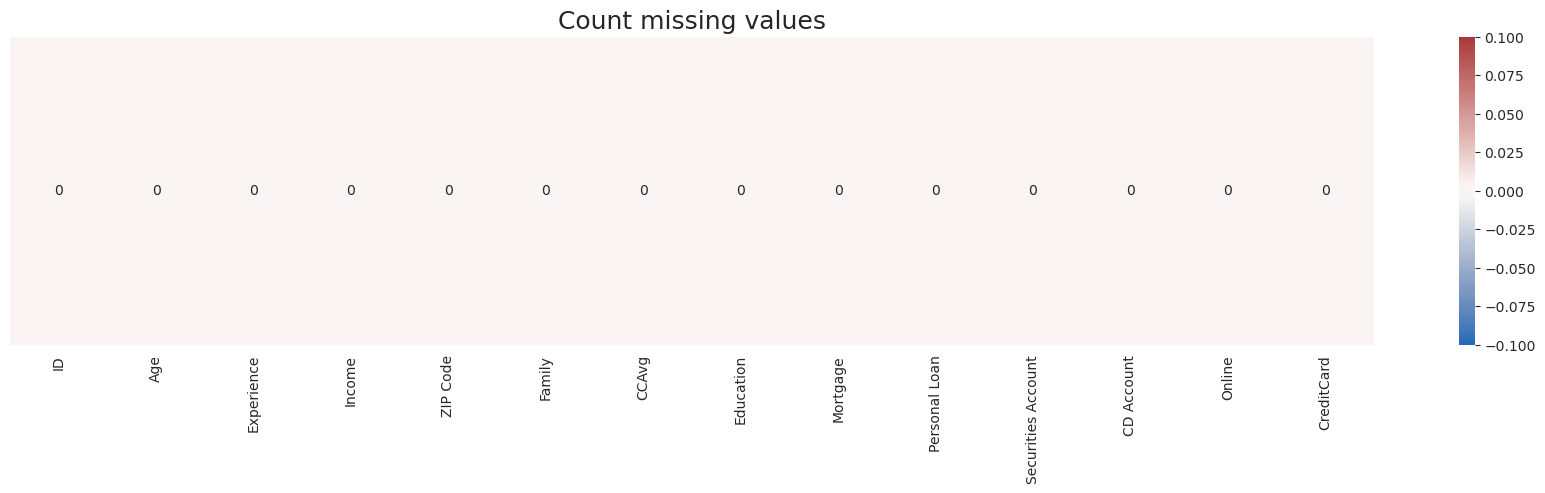

In [203]:
# Missing values
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='vlag', 
            annot=True, fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

In [204]:
df.head(10).style.set_properties(**{'background-color': '#e3c8d2'}, subset=['CCAvg'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0/40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1/50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0/30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0/60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8/90,3,0,1,0,0,0,0


In [205]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype('float64')
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [206]:
neg = df.describe()
neg.style.set_properties(**{'background-color': '#e3c8d2'}, subset=['Experience'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.060400,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.238250,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


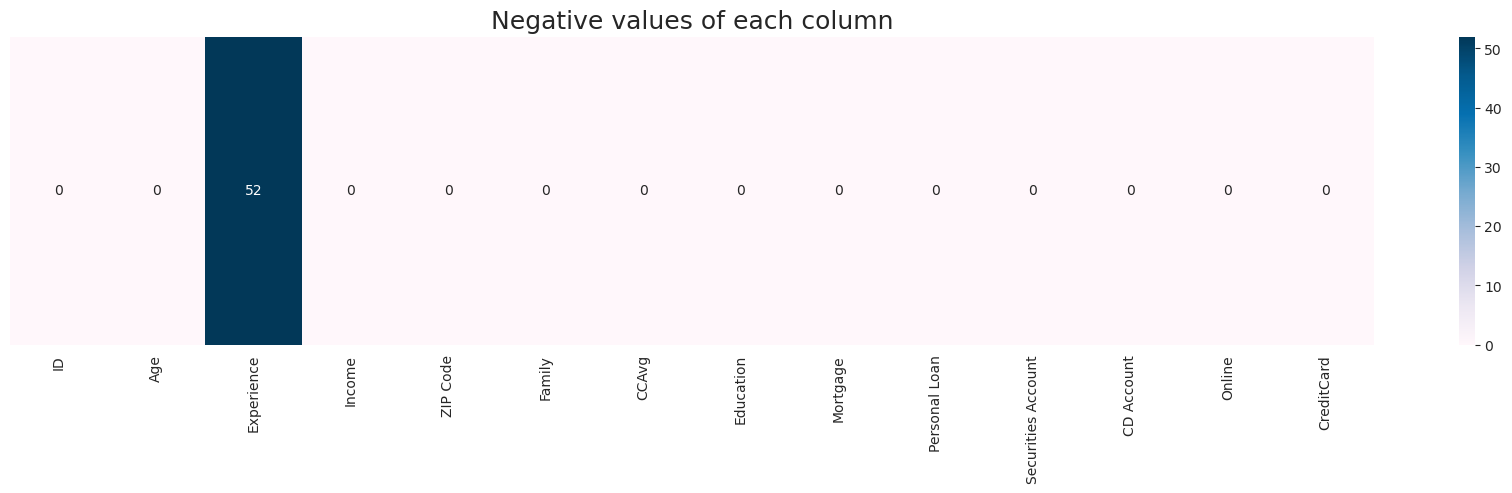

In [207]:
# Number of negative values of each feature
plt.figure(figsize=(22,4))
sns.heatmap((df.lt(0).sum()).to_frame(name='').T, cmap='PuBu', 
            annot=True, fmt='0.0f').set_title('Negative values of each column', fontsize=18)
plt.show()

In [208]:
# Rows with negative Experience values
neg = df[df['Experience'] < 0 ]
neg.style.set_properties(**{'background-color': '#e3c8d2'}, subset=['Experience'])

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.300000,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.700000,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.300000,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.750000,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.200000,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.400000,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.300000,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.300000,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.700000,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.200000,1,0,0,1,0,0,1


In [209]:
df['Experience']= abs(df['Experience'])

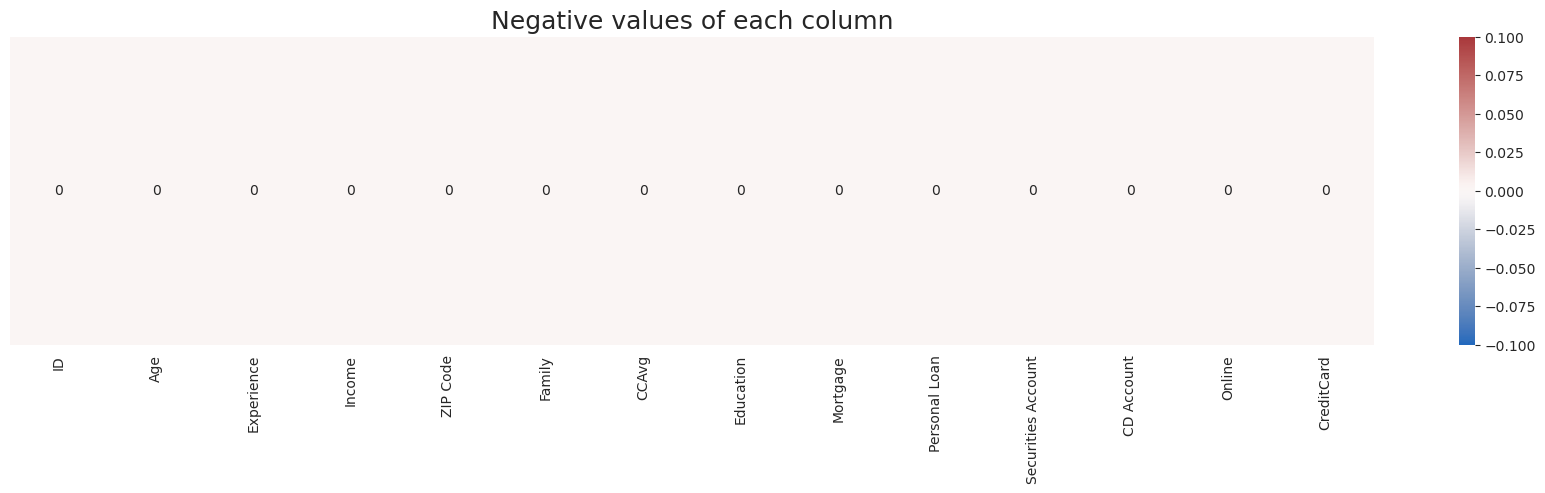

In [210]:
# Check for negative values
plt.figure(figsize=(22,4))
sns.heatmap((df.lt(0).sum()).to_frame(name='').T, cmap='vlag', 
            annot=True, fmt='0.0f').set_title('Negative values of each column', fontsize=18)
plt.show()

In [211]:
# Duplicated data
df.duplicated().sum()

0

In [212]:
df['Income'] = round(df['Income']/12, 2)
df.head(10).style.set_properties(**{'background-color': '#e3c8d2'}, subset=['Income'])  

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,4.080000,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,2.830000,90089,3,1.500000,1,0,0,1,0,0,0
2,3,39,15,0.920000,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,8.330000,94112,1,2.700000,2,0,0,0,0,0,0
4,5,35,8,3.750000,91330,4,1.000000,2,0,0,0,0,0,1
5,6,37,13,2.420000,92121,4,0.400000,2,155,0,0,0,1,0
6,7,53,27,6.000000,91711,2,1.500000,2,0,0,0,0,1,0
7,8,50,24,1.830000,93943,1,0.300000,3,0,0,0,0,0,1
8,9,35,10,6.750000,90089,3,0.600000,2,104,0,0,0,1,0
9,10,34,9,15.000000,93023,1,8.900000,3,0,1,0,0,0,0


In [213]:
# Drop ID and ZIP Code columns from dataset
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df.shape

(5000, 12)

In [214]:
# Separate numerical features
num_cols = pd.DataFrame (df, columns= ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cat_cols = pd.DataFrame (df, columns= ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'])

In [215]:
# Separate numerical and categorical features into different lists first
numerical_columns = list(df.loc[:,['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])
categorical_columns = list(df.loc[:,['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']])

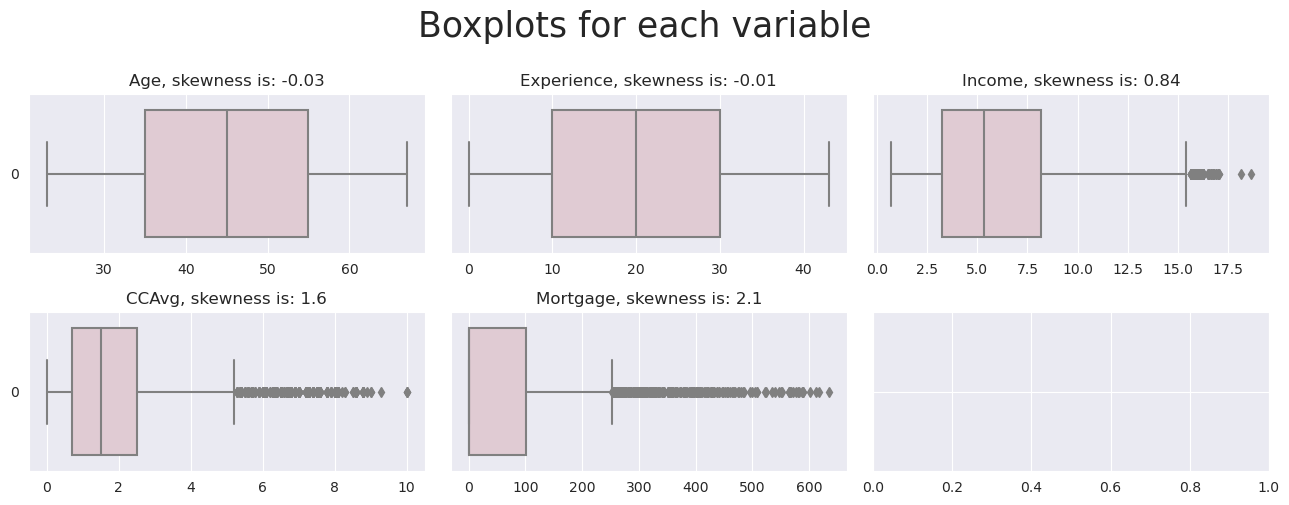

In [216]:
# Visualizing the Numerical Features by boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#e3c8d2', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [217]:
# Calculate the IQR for each column in the dataset
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

,Age,Experience,Income,CCAvg,Mortgage
0,0,0,96,324,291


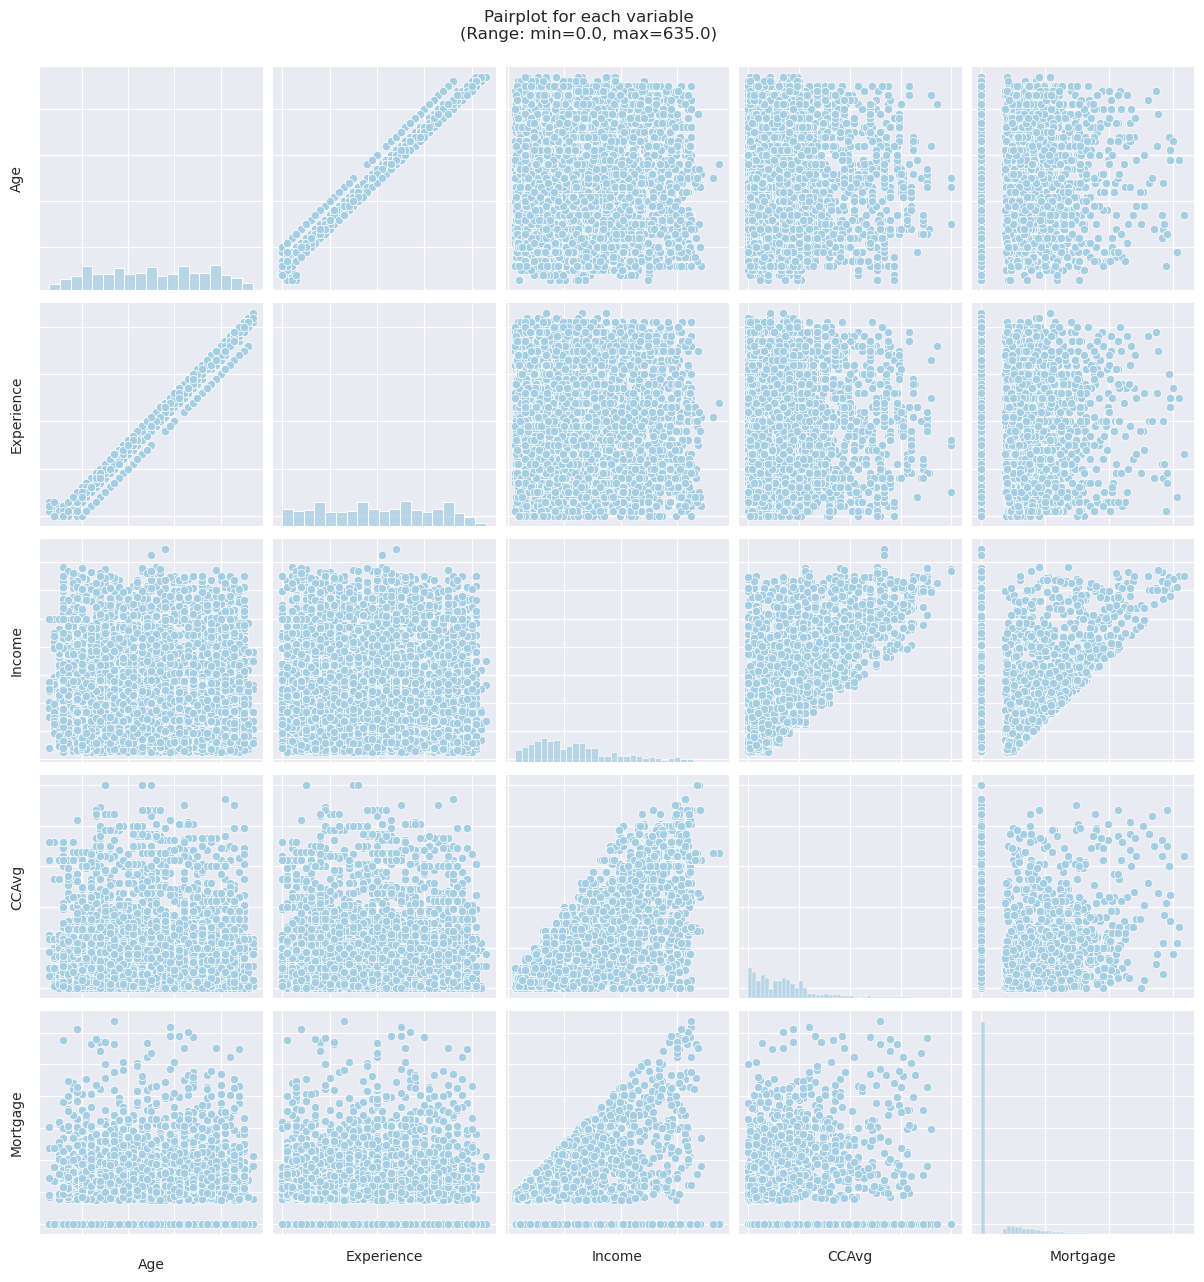

In [218]:
sns.set_style('darkgrid')
dnp = sns.pairplot(df.loc[:, numerical_columns], palette=['PuBu'])

# Add axis labels and tick labels to the plot
dnp.set(xticklabels=[], yticklabels=[])
dnp.axes[0][0].set_ylabel(numerical_columns[0], fontsize=10)
dnp.axes[-1][0].set_xlabel(numerical_columns[0], fontsize=10)
dnp.axes[-1][0].xaxis.labelpad = 10
dnp.axes[-1][-1].yaxis.labelpad = 10

# Title of the plot
dnp.fig.suptitle('Pairplot for each variable\n(Range: min={}, max={})'.format(df[numerical_columns].min().min(), df[numerical_columns].max().max()), y=1.03, fontsize=12)

# Show the plot
plt.show()

In [219]:
# Final dataset after cleaning
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,4,1.6,1,0,0,1,0,0,0
1,45,19,2.83,3,1.5,1,0,0,1,0,0,0
2,39,15,0.92,1,1.0,1,0,0,0,0,0,0
3,35,9,8.33,1,2.7,2,0,0,0,0,0,0
4,35,8,3.75,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.33,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.25,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.00,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.08,3,0.5,2,0,0,0,0,1,0


Total number of features except for the target: 11
Number of categorical (<25 Unique Values) features: 6
Number of continuous features: 5


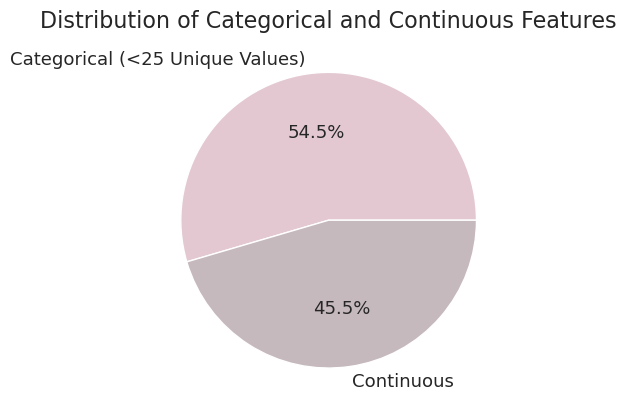

In [220]:
TARGET = 'Personal Loan'
FEATURES = [col for col in df.columns if col not in ['df', TARGET]]

cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

print(f"Total number of features except for the target: {len(FEATURES)}")
print(f"\033[92mNumber of categorical (<25 Unique Values) features: {num_cat_features}")
print(f"\033[96mNumber of continuous features: {num_cont_features}")

# Define labels and colors for the pie chart
labels = ['Categorical (<25 Unique Values)', 'Continuous']
colors = ['#e3c8d2', '#c6b9be']

plt.pie([num_cat_features, num_cont_features], 
        labels=labels,
        colors=colors,
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Categorical and Continuous Features', fontsize=16)

# Show the plot
plt.show()

In [221]:
y = df['Personal Loan']
print(f'Percentage of Borrowed loan:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} Customer)\nPercentage of Unborrowed loan: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} Customer)')

Percentage of Borrowed loan:  9.6 %  --> (480 Customer)
Percentage of Unborrowed loan: 90.4  %  --> (4520 Customer)


In [222]:
labels=["Don't Accept Loan", "Accept Loan"]

Accept_or_Dont_Accept = df['Personal Loan'].value_counts().tolist()
values = [Accept_or_Dont_Accept[0], Accept_or_Dont_Accept[1]]

fig = px.pie(values=df['Personal Loan'].value_counts(), names=labels, width=700, height=400, color_discrete_sequence=['#d3979e', '#cccccc']
             ,title="Accept Loan vs. Don't Accept Loan")    
fig.show()

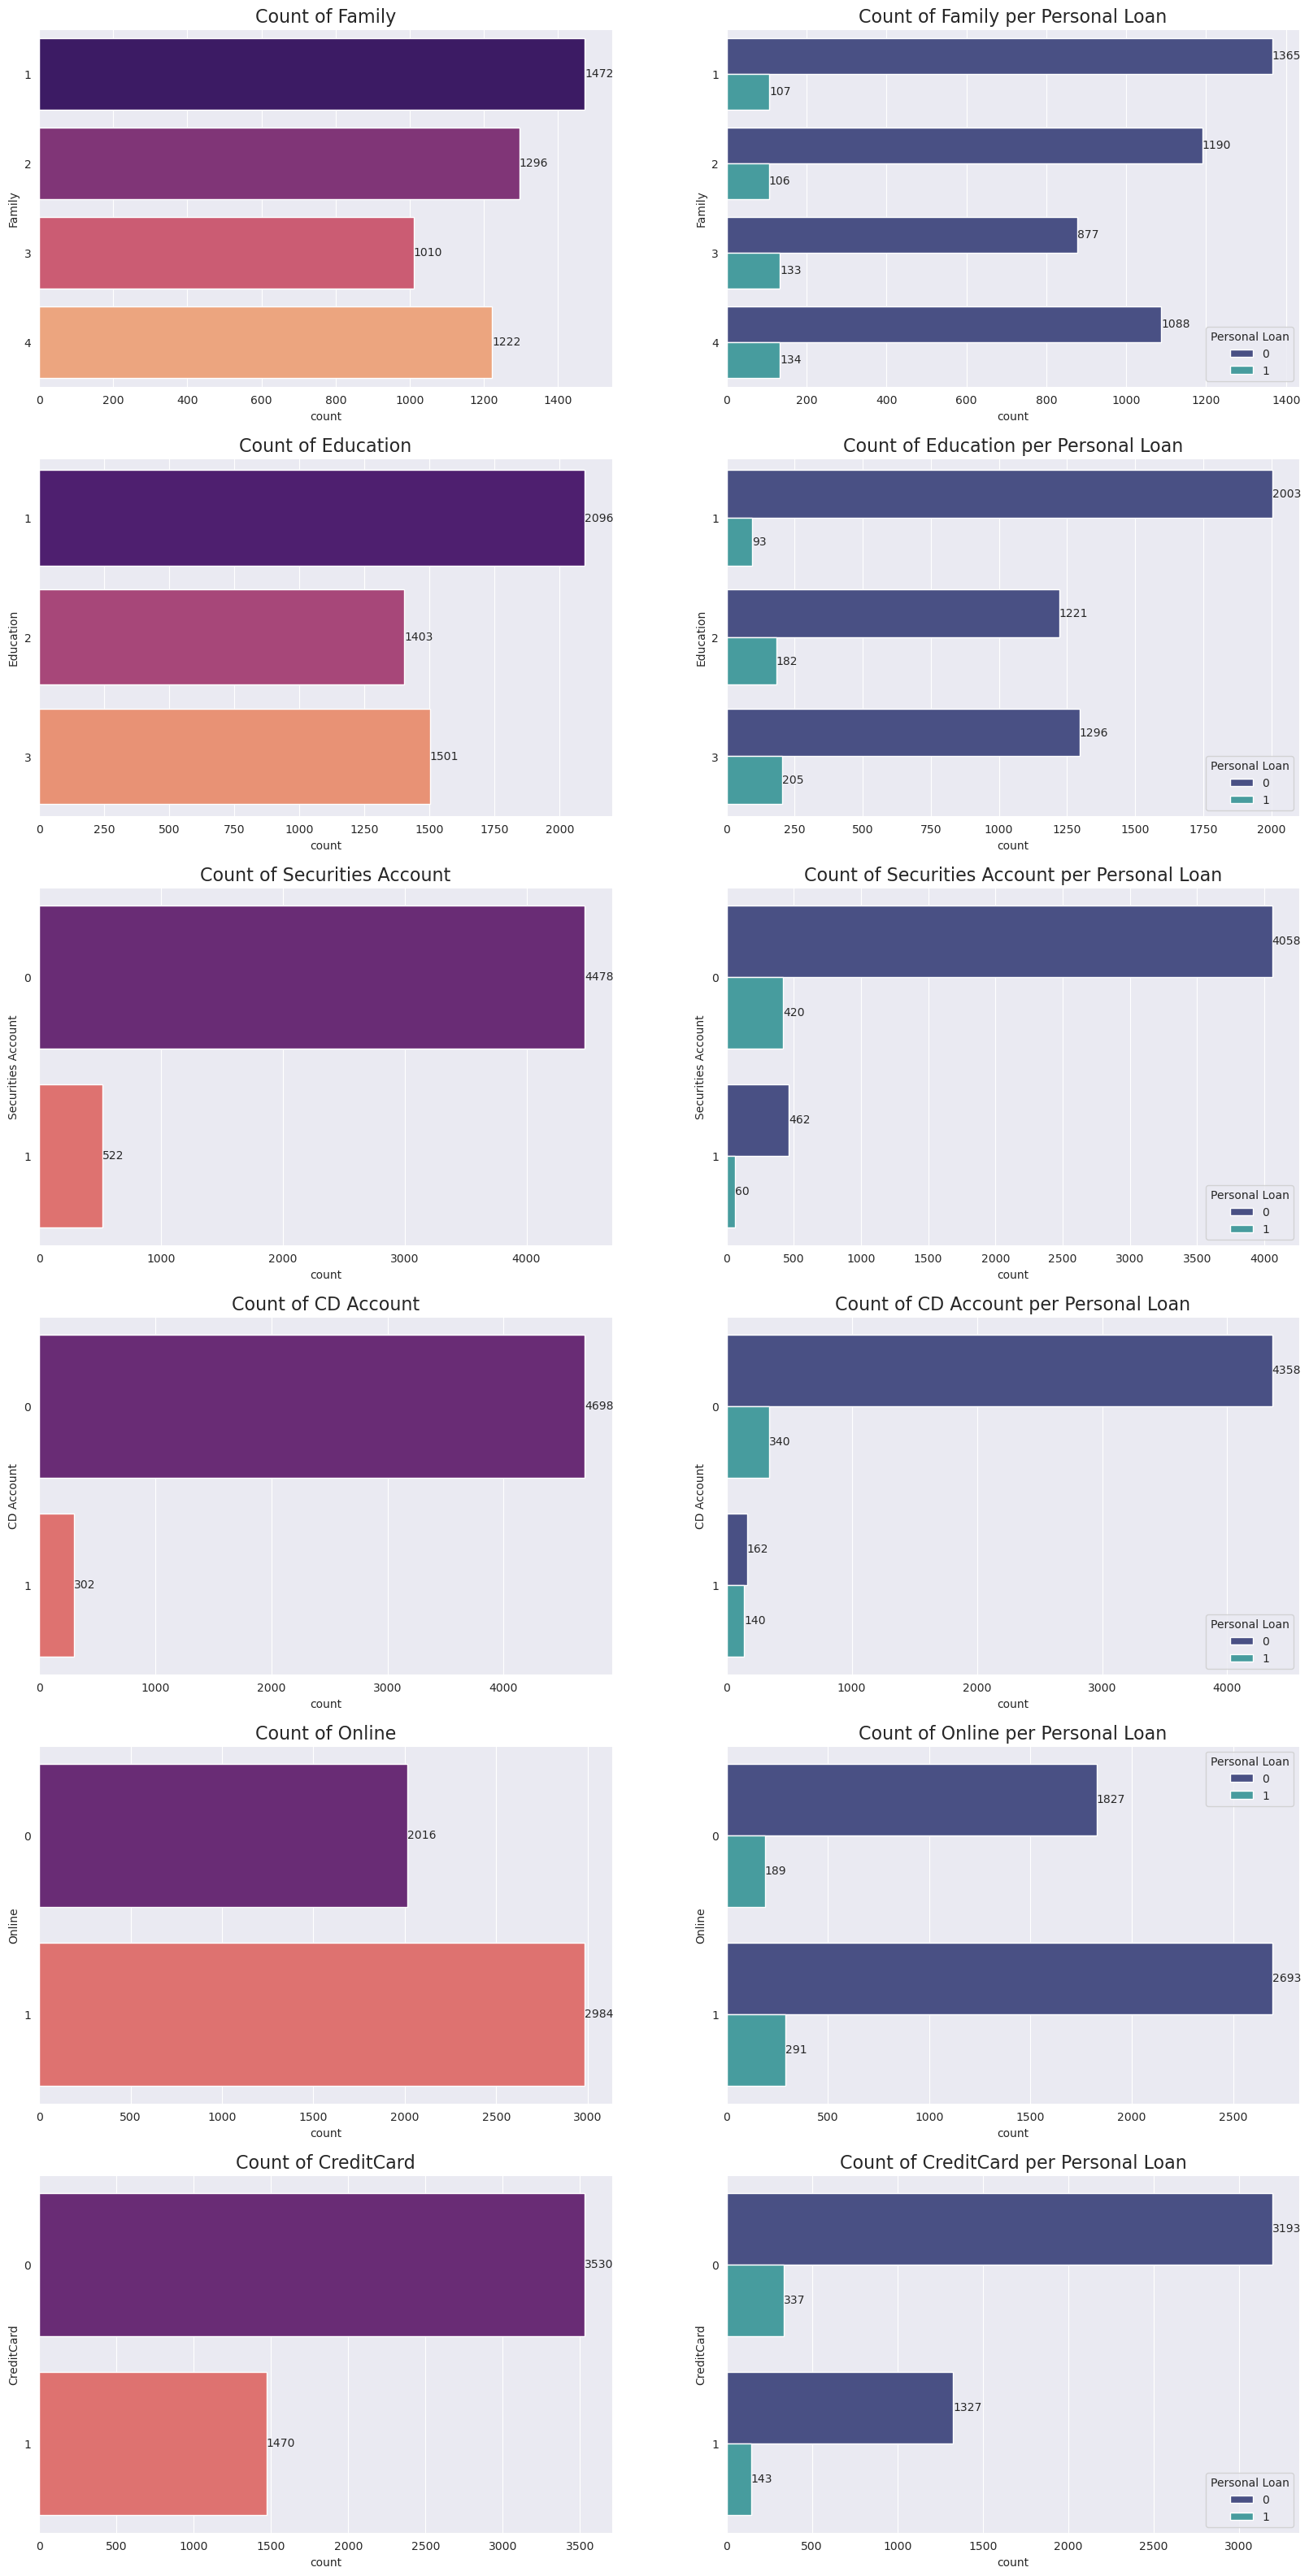

In [223]:
fig, axes = plt.subplots(6,2, figsize=(20,40))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=df, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='16')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=df, y=col, palette='mako', orient='h',  hue='Personal Loan',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Personal Loan', fontsize='16')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

In [224]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [225]:
print("An overview of percentages of each unique value in different categorical features:")
df_nunique = {var: pd.DataFrame((df[var].value_counts()/len(df[var])*100).map('{:.2f}%'.format)) 
              for var in {'Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'}}
multi_table([df_nunique['Family'], df_nunique['Education'],df_nunique['Securities Account'],df_nunique['CD Account'],df_nunique['Online'],df_nunique['CreditCard']])

An overview of percentages of each unique value in different categorical features:


,Family
1,29.44%
2,25.92%
4,24.44%
3,20.20%
,Education
1,41.92%
3,30.02%
2,28.06%
,Securities Account
0,89.56%


In [226]:
# Describing the categorical variables
cat_cols.describe().style.background_gradient(cmap='PuBu')

,Family,Education,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.396400,1.881000,0.104400,0.060400,0.596800,0.294000
std,1.147663,0.839869,0.305809,0.238250,0.490589,0.455637
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000


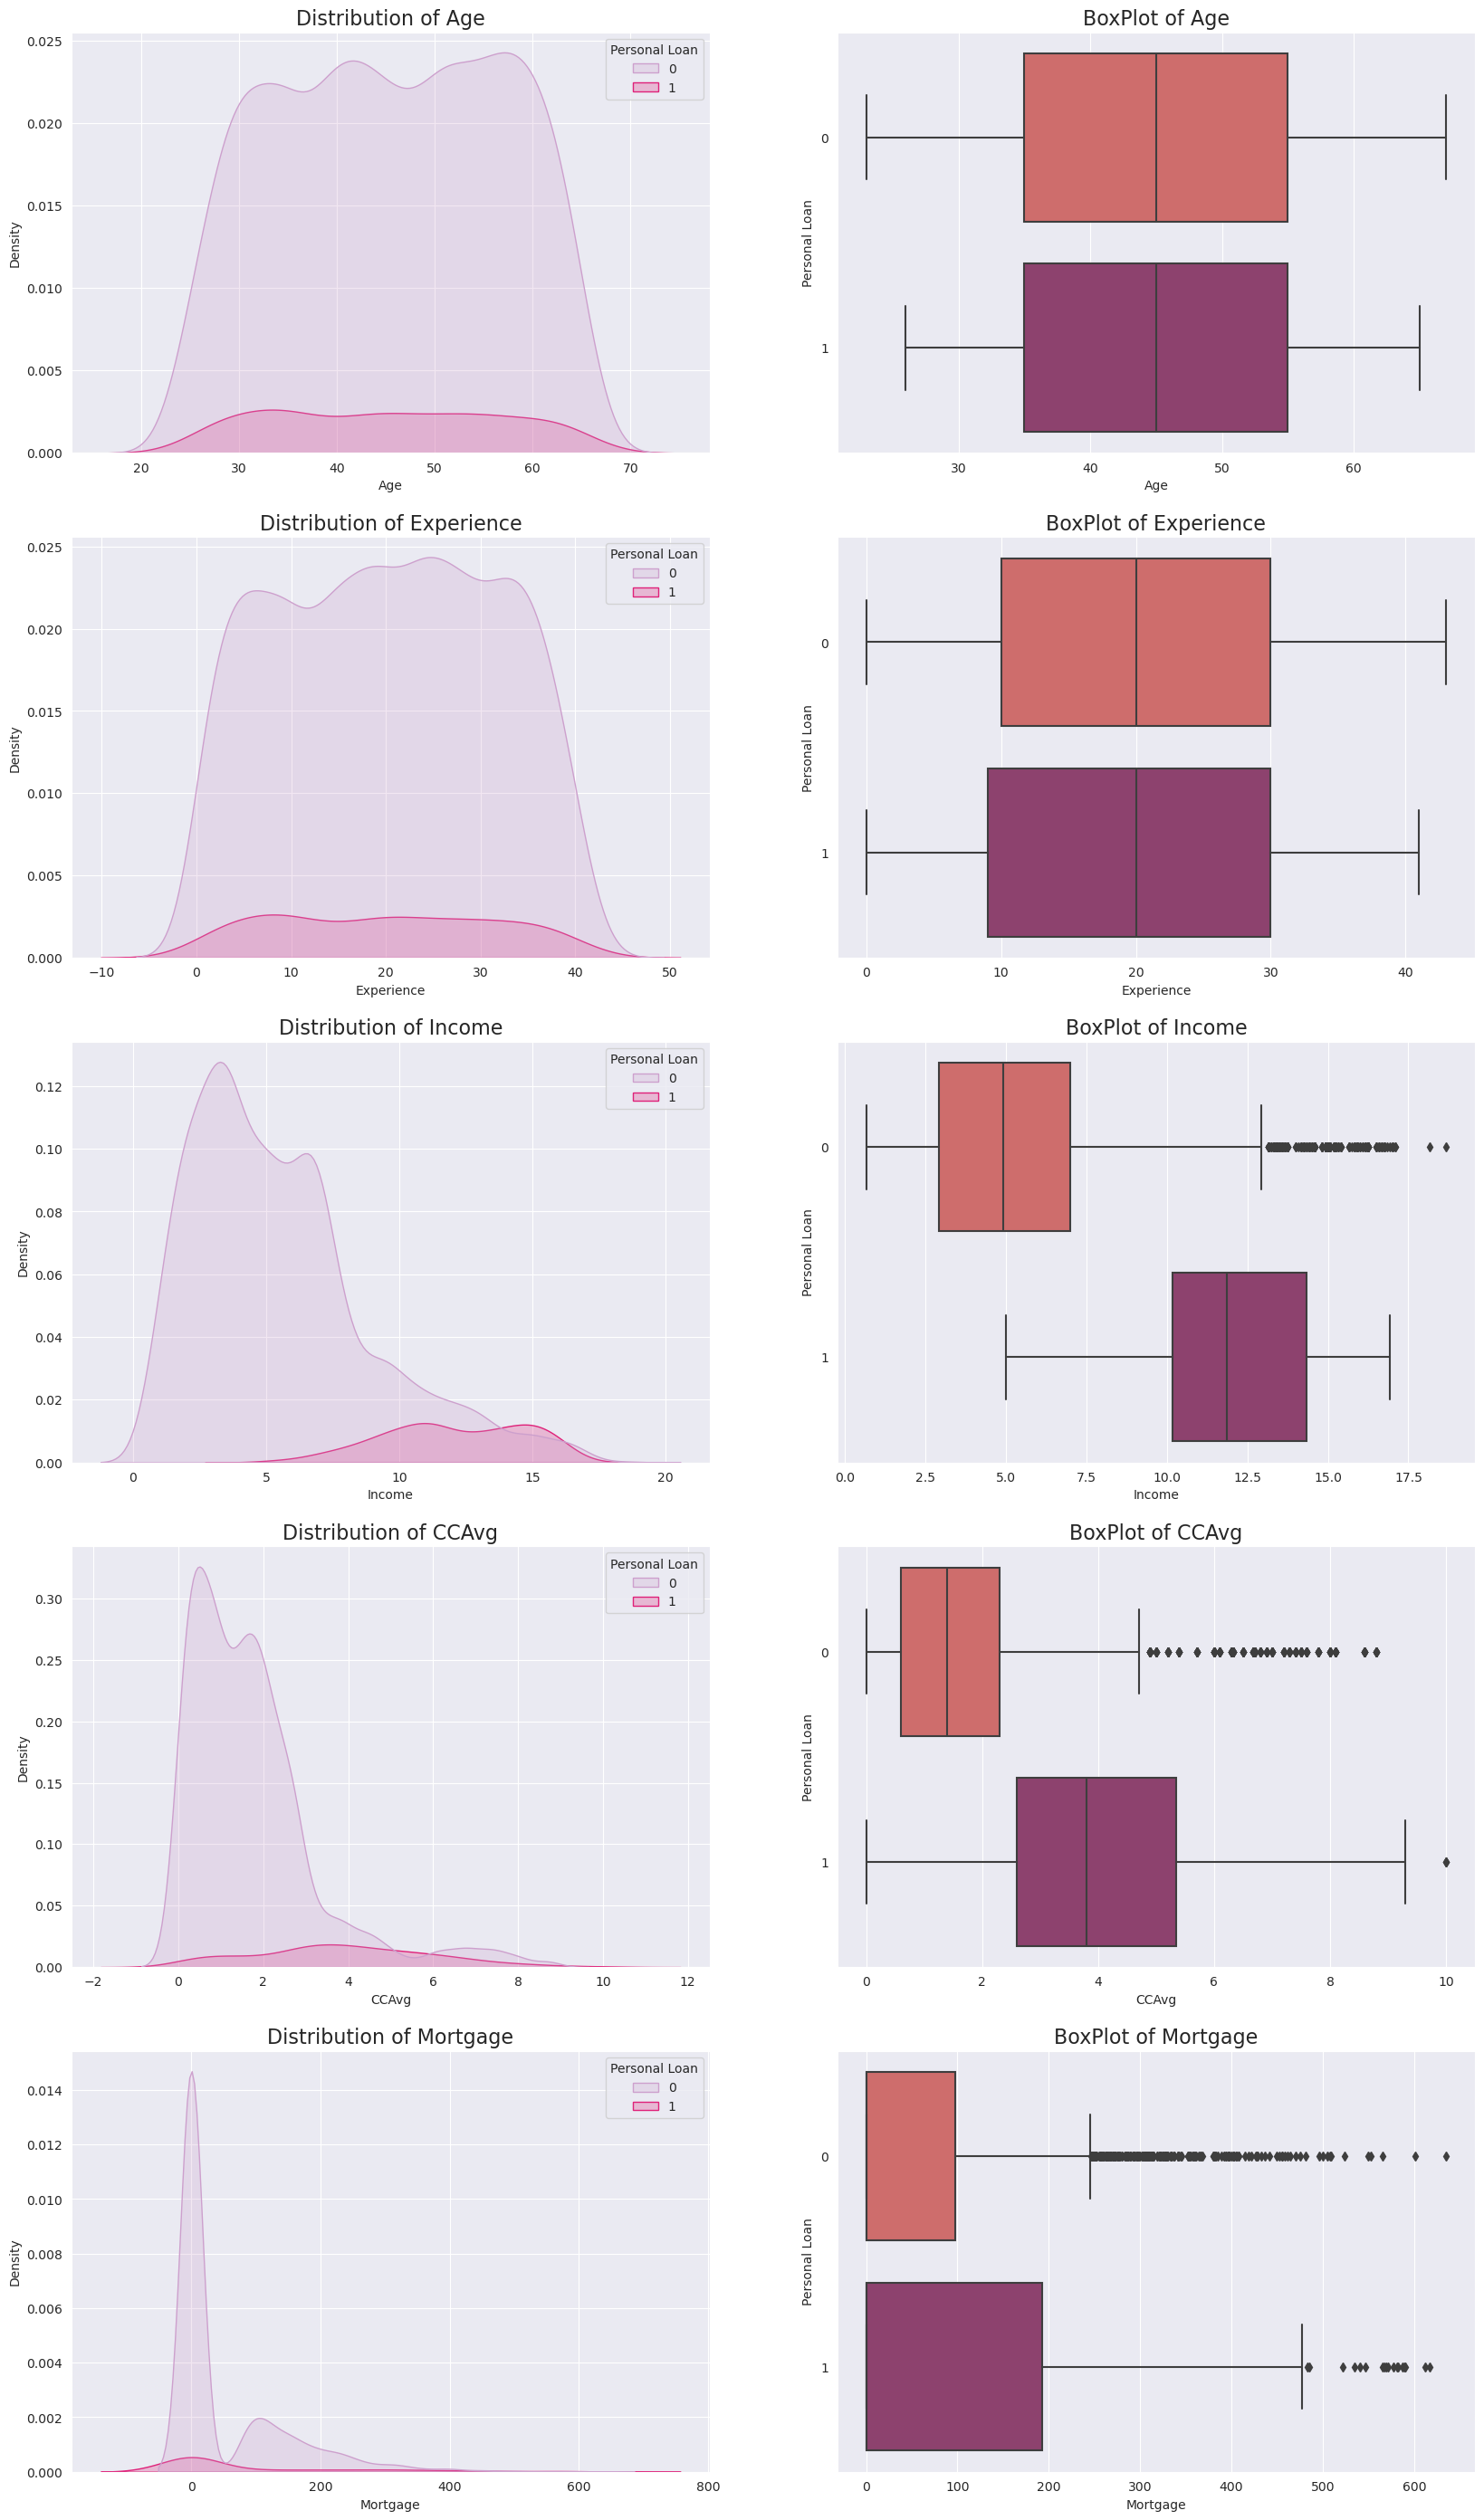

In [227]:
fig, axes = plt.subplots(5,2, figsize=(20,35))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=df, x=col, palette='PuRd',fill=True , hue='Personal Loan', 
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=df, x=col, palette='flare' , y='Personal Loan', orient='h', 
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

In [228]:
# The average values of borrowing and not borrowing in different variables
df.groupby(df['Personal Loan']).mean().T.style.background_gradient(cmap='PuBu')

Personal Loan,0,1
Age,45.367257,45.066667
Experience,20.165487,19.843750
Income,5.519827,12.062375
Family,2.373451,2.612500
CCAvg,1.729009,3.905354
Education,1.843584,2.233333
Mortgage,51.789381,100.845833
Securities Account,0.102212,0.125000
CD Account,0.035841,0.291667
Online,0.595796,0.606250


In [229]:
df.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [230]:
print('Oldest:',df['Age'].max(),'Years old')
print('Youngest:',df['Age'].min(),'Years old')
print('Average Age:',df['Age'].mean(),'Years old')

Oldest: 67 Years old
Youngest: 23 Years old
Average Age: 45.3384 Years old


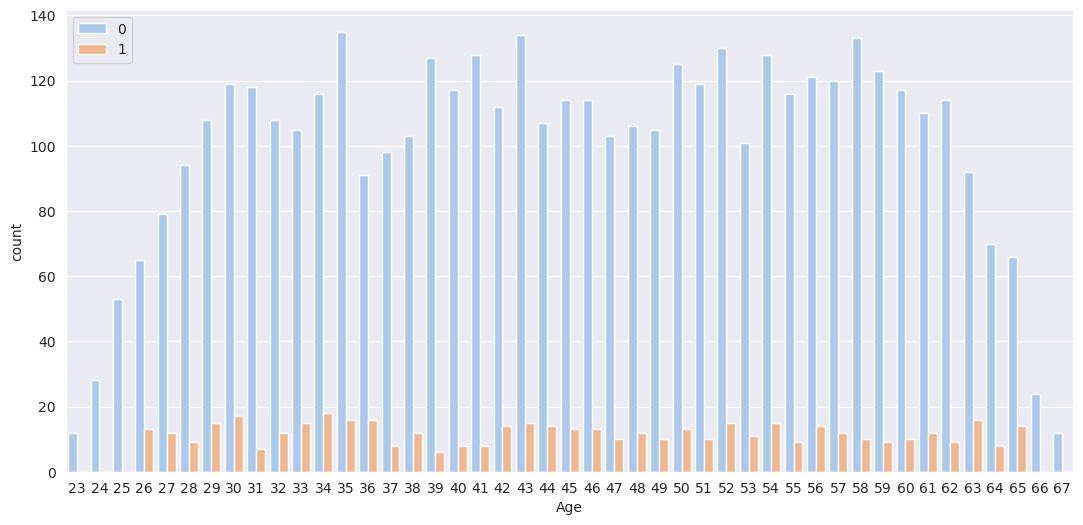

In [231]:
# Age based on Personal Loan
plt.figure(figsize = (13,6))
sns.countplot(x = df['Age'], hue ="Personal Loan", data=df, palette="pastel") 
plt.legend(loc='upper left')
plt.show()

In [232]:
df.Experience.describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [233]:
print('Max:',df['Experience'].max(),'Years Experience')
print('Min:',df['Experience'].min(),'Years Experience')
print('Mean:',df['Experience'].mean(),'Years Experience')

Max: 43 Years Experience
Min: 0 Years Experience
Mean: 20.1346 Years Experience


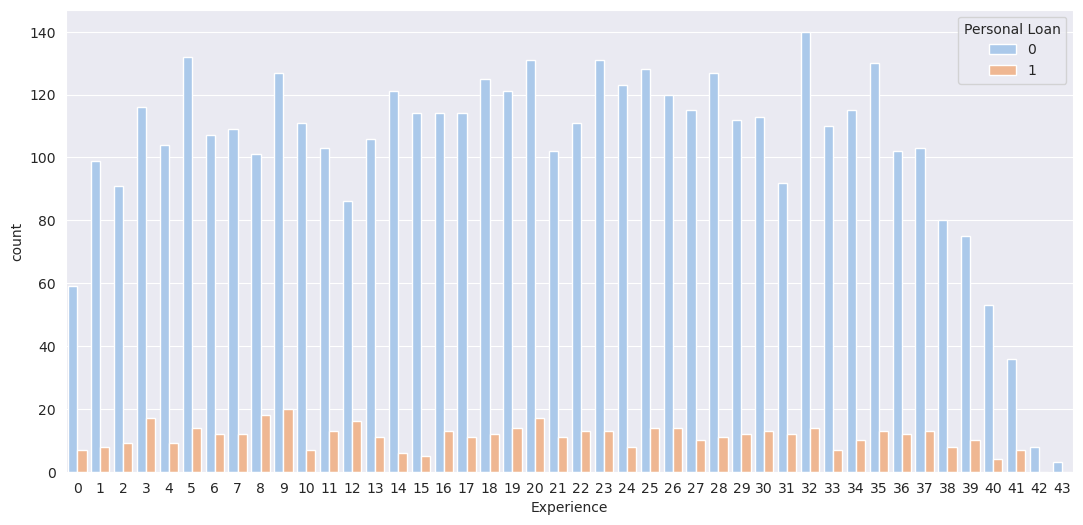

In [234]:
# Experience based on Personal Loan
plt.figure(figsize = (13,6))
sns.countplot(x = df['Experience'], hue ="Personal Loan", data=df, palette="pastel") 
plt.show()

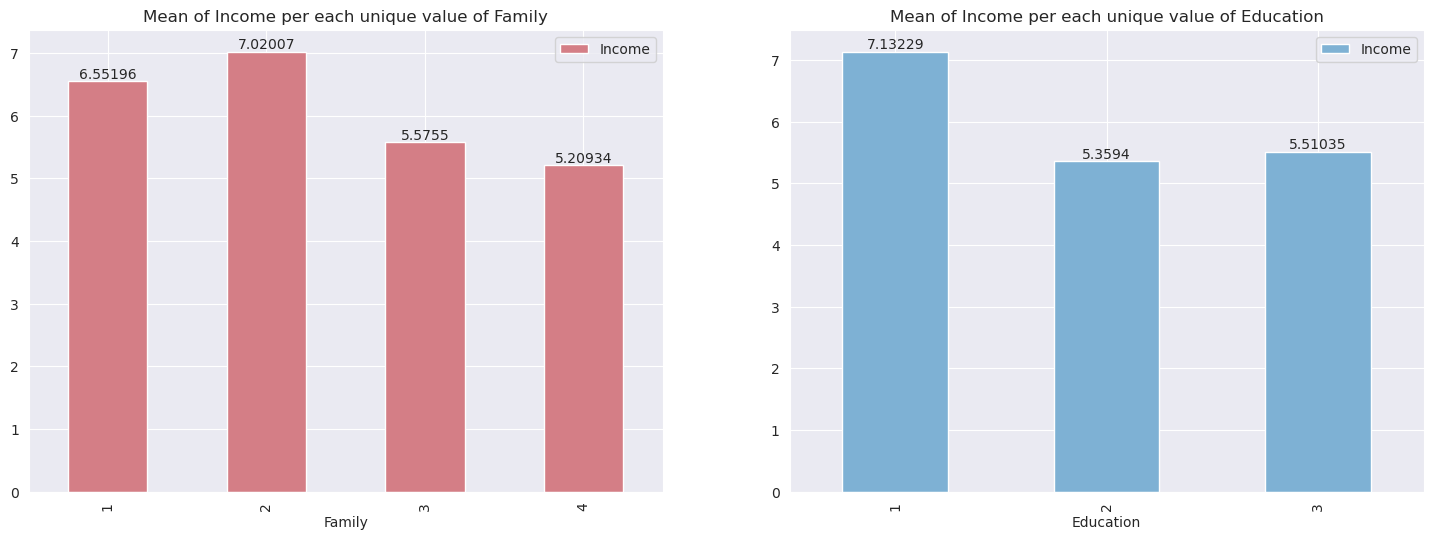

In [235]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Income','Family']].groupby(['Family']).mean().plot.bar(color='#d47e86',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Income per each unique value of Family')

ax2= df[['Income','Education']].groupby(['Education']).mean().plot.bar(color='#7eb1d4',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Income per each unique value of Education')

plt.show()

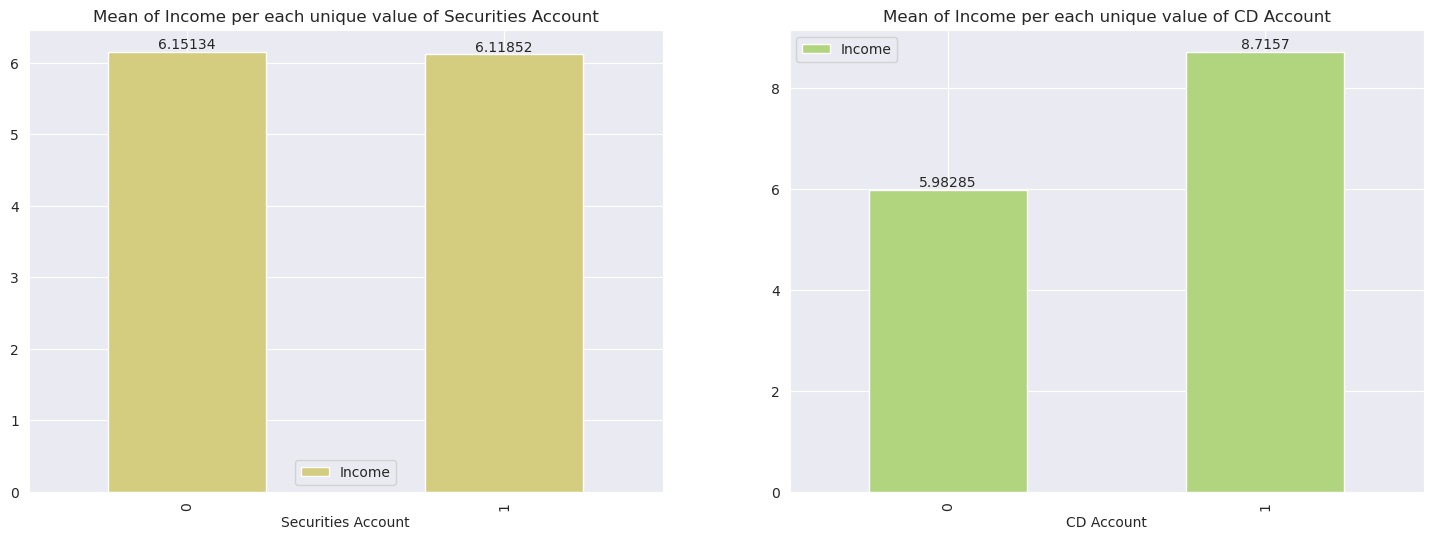

In [236]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Income','Securities Account']].groupby(['Securities Account']).mean().plot.bar(color='#d4cc7e',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Income per each unique value of Securities Account')

ax2= df[['Income','CD Account']].groupby(['CD Account']).mean().plot.bar(color='#b1d47e',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Income per each unique value of CD Account')

plt.show()

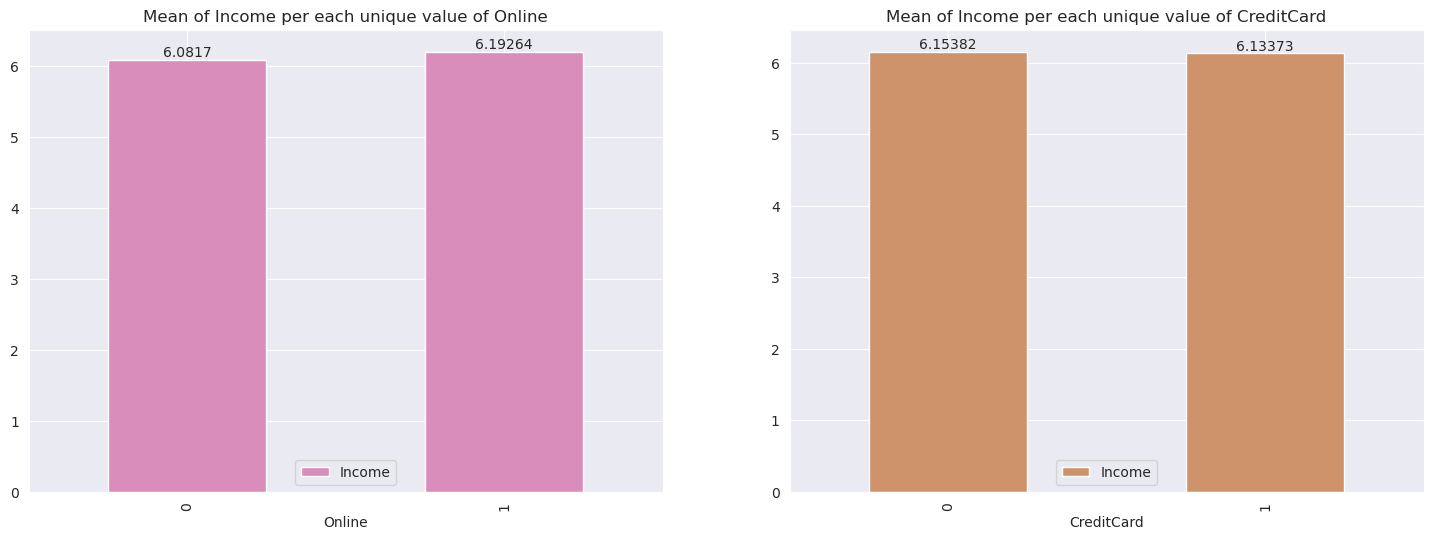

In [237]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Income','Online']].groupby(['Online']).mean().plot.bar(color='#d98dba',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Income per each unique value of Online')

ax2= df[['Income','CreditCard']].groupby(['CreditCard']).mean().plot.bar(color='#ce936b',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Income per each unique value of CreditCard')

plt.show()

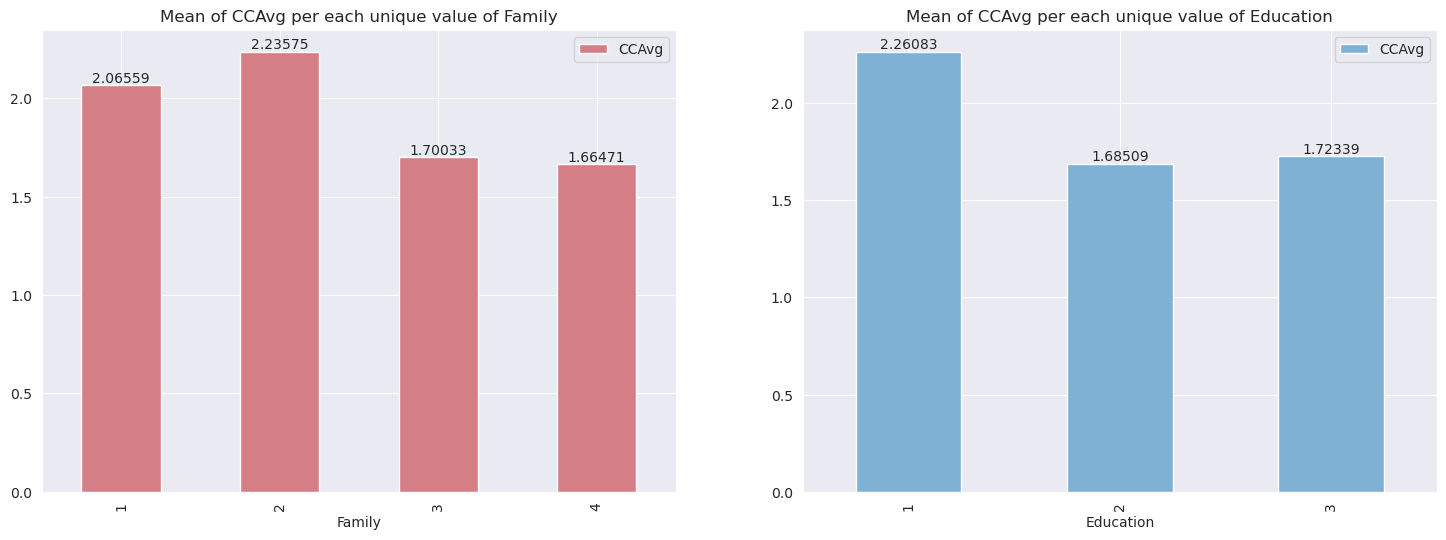

In [238]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['CCAvg','Family']].groupby(['Family']).mean().plot.bar(color='#d47e86',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of CCAvg per each unique value of Family')

ax2= df[['CCAvg','Education']].groupby(['Education']).mean().plot.bar(color='#7eb1d4',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of CCAvg per each unique value of Education')

plt.show()

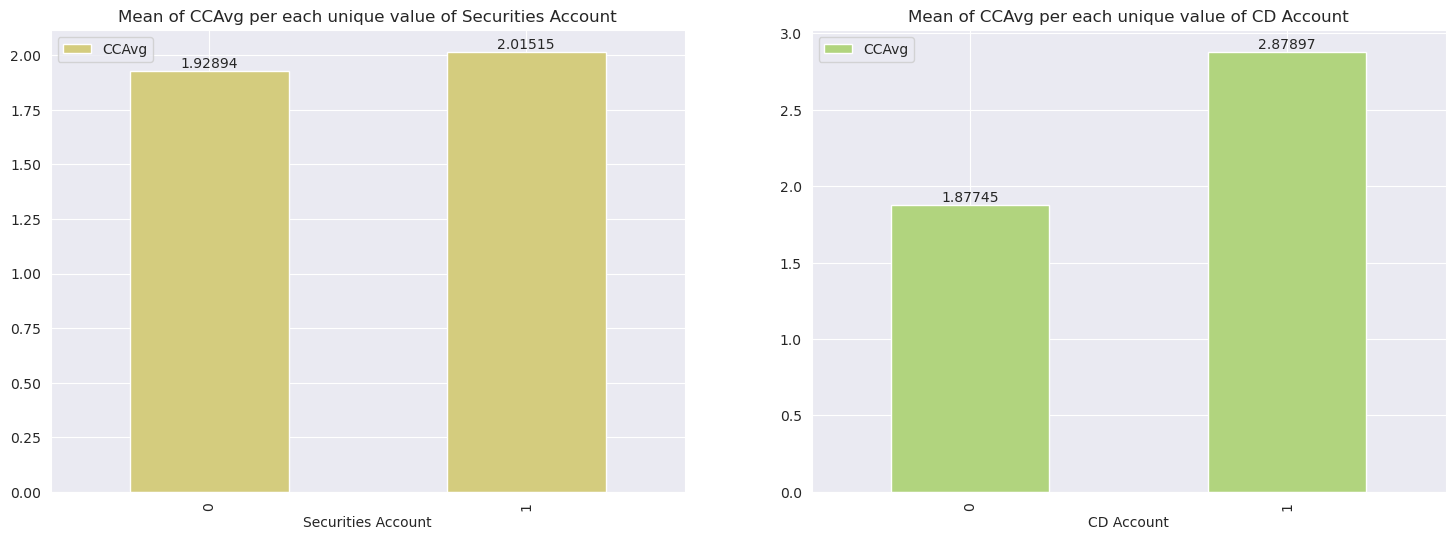

In [239]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['CCAvg','Securities Account']].groupby(['Securities Account']).mean().plot.bar(color='#d4cc7e',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of CCAvg per each unique value of Securities Account')

ax2= df[['CCAvg','CD Account']].groupby(['CD Account']).mean().plot.bar(color='#b1d47e',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of CCAvg per each unique value of CD Account')

plt.show()

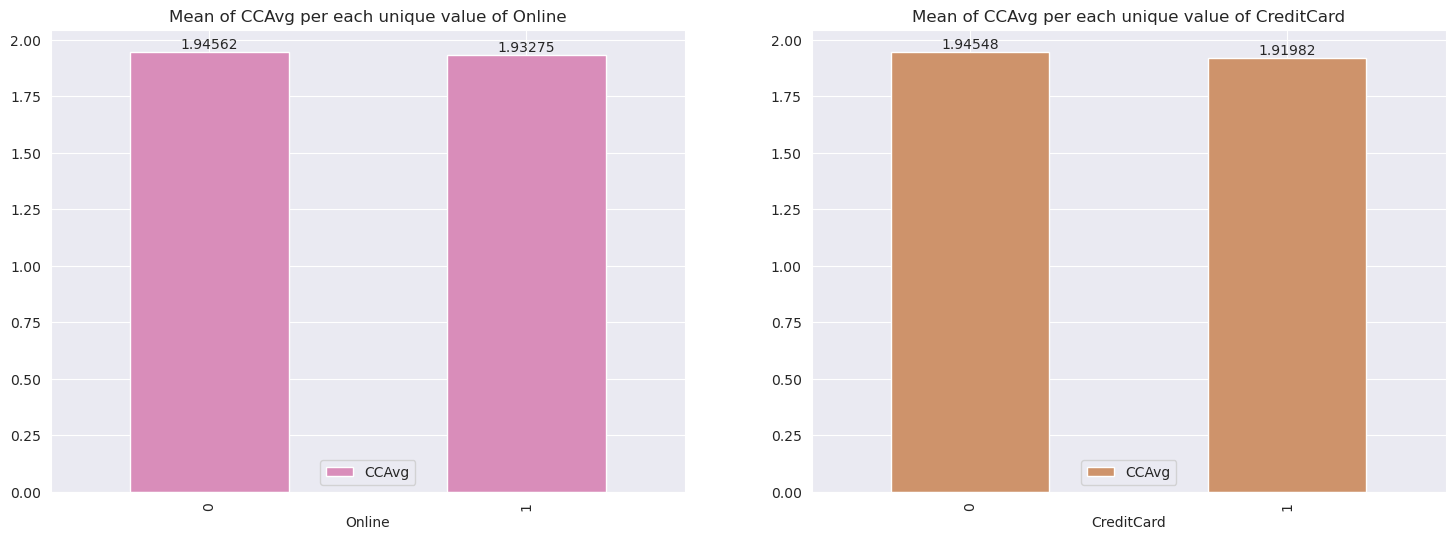

In [240]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['CCAvg','Online']].groupby(['Online']).mean().plot.bar(color='#d98dba',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of CCAvg per each unique value of Online')

ax2= df[['CCAvg','CreditCard']].groupby(['CreditCard']).mean().plot.bar(color='#ce936b',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of CCAvg per each unique value of CreditCard')

plt.show()

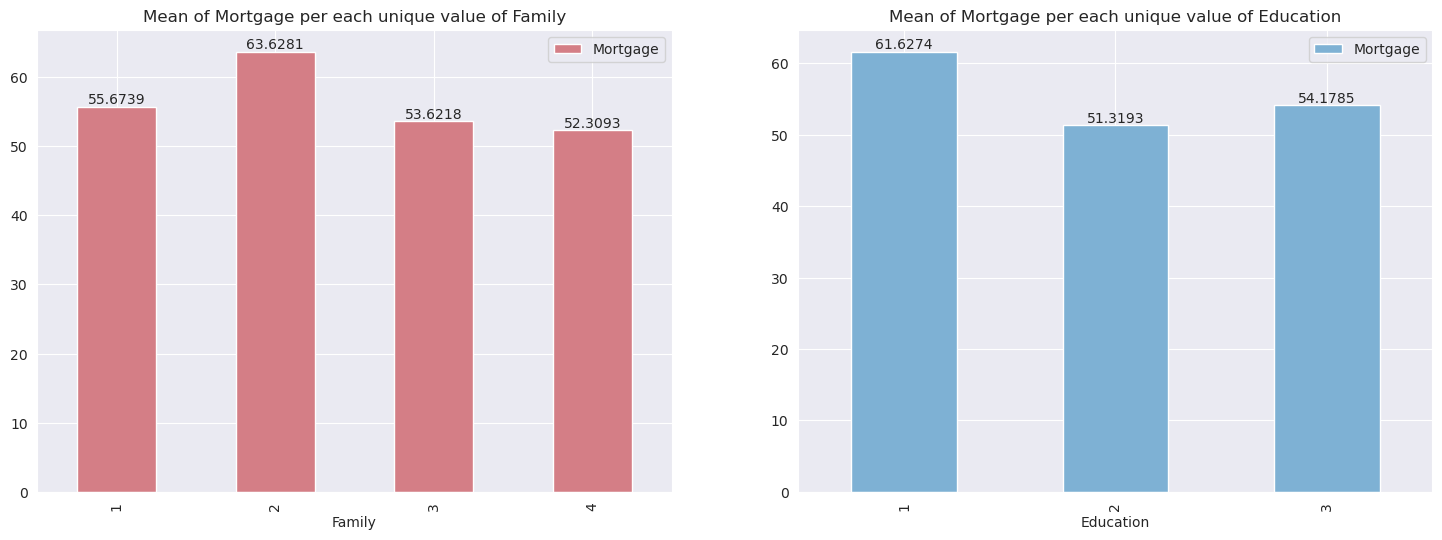

In [241]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Mortgage','Family']].groupby(['Family']).mean().plot.bar(color='#d47e86',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Mortgage per each unique value of Family')

ax2= df[['Mortgage','Education']].groupby(['Education']).mean().plot.bar(color='#7eb1d4',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Mortgage per each unique value of Education')

plt.show()

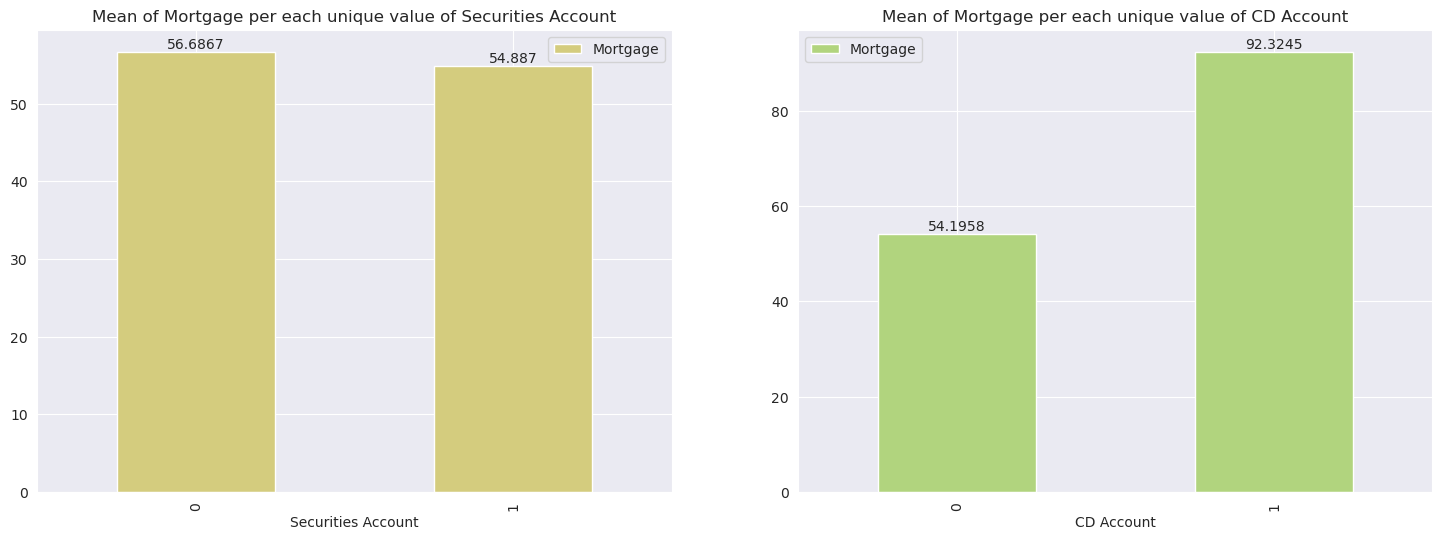

In [242]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Mortgage','Securities Account']].groupby(['Securities Account']).mean().plot.bar(color='#d4cc7e',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Mortgage per each unique value of Securities Account')

ax2= df[['Mortgage','CD Account']].groupby(['CD Account']).mean().plot.bar(color='#b1d47e',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Mortgage per each unique value of CD Account')

plt.show()

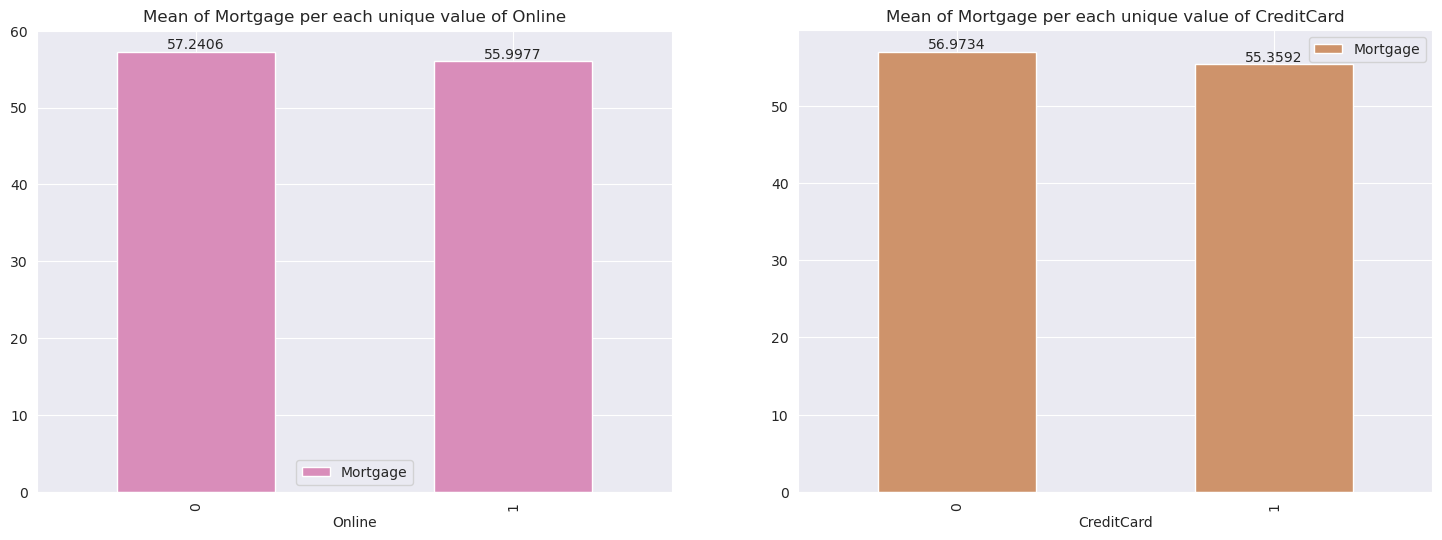

In [243]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Mortgage','Online']].groupby(['Online']).mean().plot.bar(color='#d98dba',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Mortgage per each unique value of Online')

ax2= df[['Mortgage','CreditCard']].groupby(['CreditCard']).mean().plot.bar(color='#ce936b',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Mortgage per each unique value of CreditCard')

plt.show()

In [244]:
df.loc[:, ~df.columns.isin(categorical_columns)].describe().T.style.background_gradient(cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Age,5000.000000,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.000000
Experience,5000.000000,20.134600,11.415189,0.000000,10.000000,20.000000,30.000000,43.000000
Income,5000.000000,6.147912,3.836233,0.670000,3.250000,5.330000,8.170000,18.670000
CCAvg,5000.000000,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.000000
Mortgage,5000.000000,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.000000
Personal Loan,5000.000000,0.096000,0.294621,0.000000,0.000000,0.000000,0.000000,1.000000


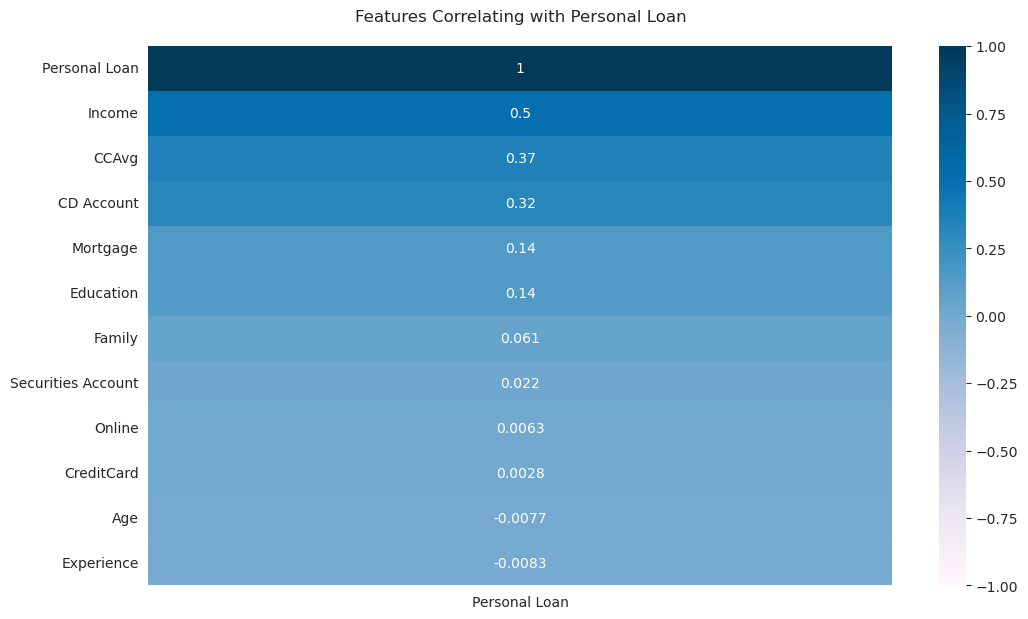

In [245]:
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (df.corr()[['Personal Loan']].sort_values (by = 'Personal Loan', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'PuBu')
heatmap.set_title ('Features Correlating with Personal Loan', fontdict = {'fontsize':12}, pad = 18);

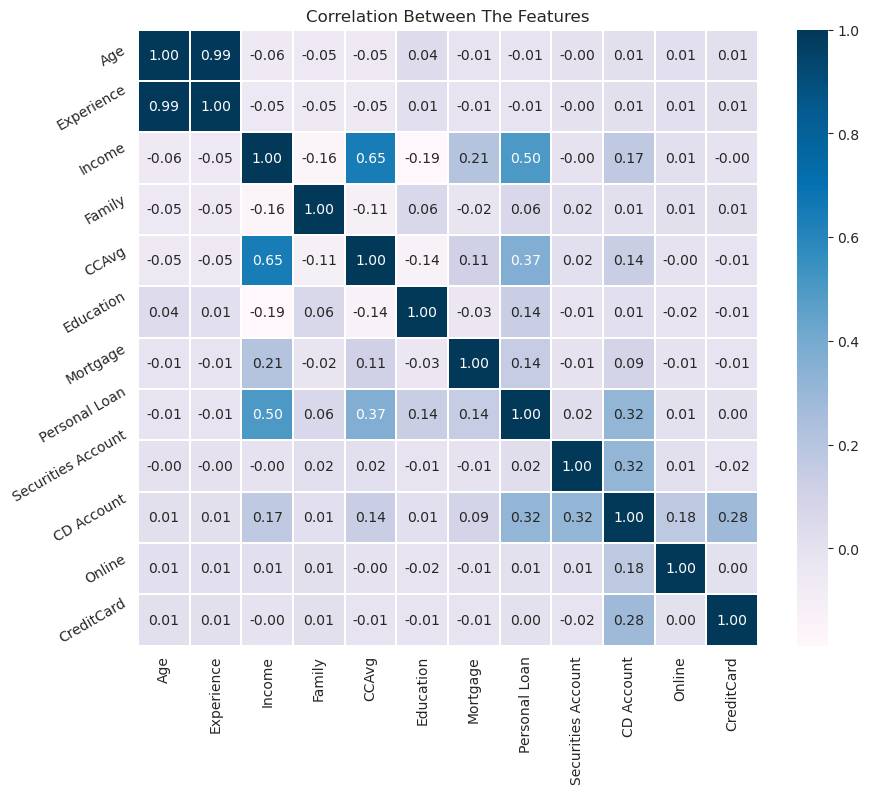

In [246]:
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Correlation Between The Features')
a = sns.heatmap(df.corr(), annot=True, cmap='PuBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

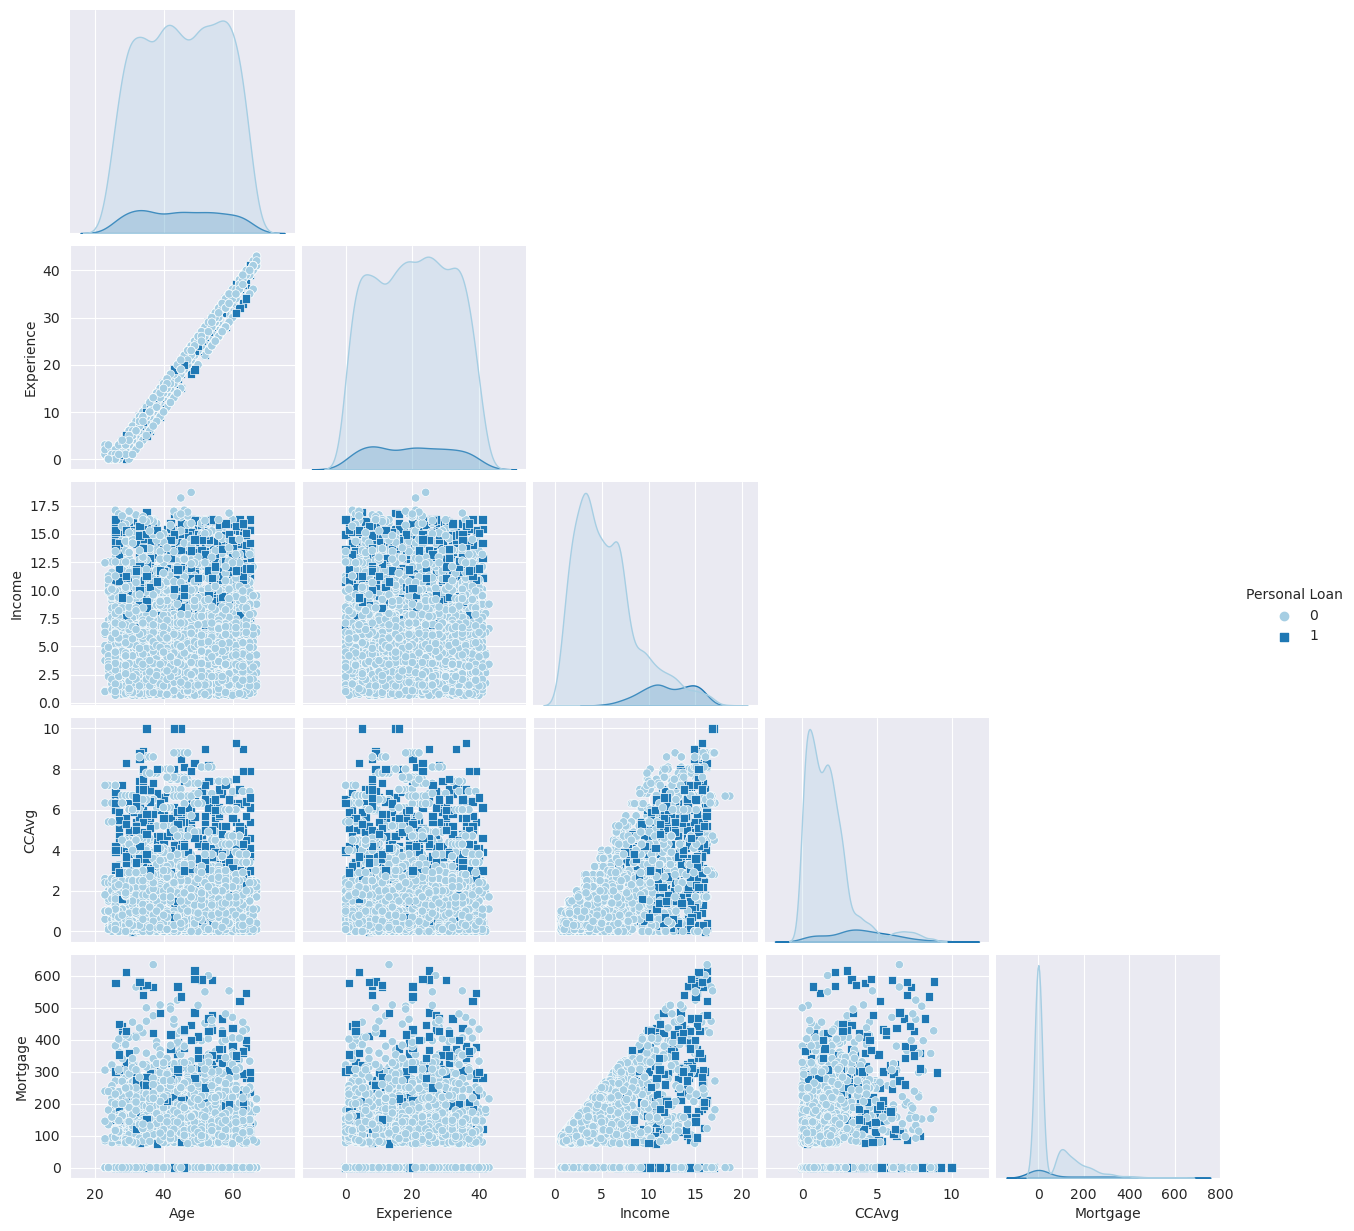

In [247]:
# Pairplot based on Personal Loan
sns.set_palette(sns.color_palette("Paired", 8))  
sns.pairplot(df, x_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
                 y_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
                 hue='Personal Loan', markers=["o", "s"], corner=True)   
plt.show()

In [248]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [249]:
# Check the shape of X and y
print ('X:', X.shape, '\ny:', y.shape)

X: (5000, 11) 
y: (5000,)


In [250]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=size, random_state=0)
    log_model = LogisticRegression (solver="newton-cg", C=1, n_jobs=-1, random_state=0)
    log_model.fit (X_train1, y_train1)
    score.append (log_model.score (X_test1, y_test1))
    
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')

,Test size,Score
0,0.200000,0.959000
1,0.250000,0.958400
2,0.300000,0.953333


In [251]:
# Split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)

In [252]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape:', X_train1.shape)
print('X_test shape:', X_test1.shape)
print('y_train shape:', y_train1.shape)
print('y_test shape:',y_test1.shape)

X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)


In [253]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train1 = scaler.fit_transform(X_train1)

# Transform the test data using the same scaler
X_test1 = scaler.transform(X_test1)

In [254]:
# Instantiate the model
logistic_model = LogisticRegression(max_iter = 1000)

# Fit the model to the training set
logistic_model.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000)

In [255]:
y_pred = logistic_model.predict(X_test1)

In [256]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

Model Accuracy Score: 0.9520


In [257]:
# Scores on training and test set
print('Training set score: {:.4f}'.format(logistic_model.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(logistic_model.score(X_test1, y_test1)))

Training set score: 0.9525
Test set score: 0.9520


In [258]:
y_test1.shape

(1000,)

In [259]:
# Check Personal Loan distribution in test set
s = pd.Series(y_test1)
s.value_counts()

0    904
1     96
dtype: int64

In [260]:
# Check null accuracy score
null_accuracy = (904/(904+96))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9040


In [261]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=False)

In [262]:
score = cross_val_score(logistic_model, X_train1, y_train1, cv=kf, scoring='recall')
logistic_model_cv_score = score.mean()
logistic_model_cv_stdev = stdev(score)
print('Cross Validation Recall scores are:\n {}'.format(score))

Cross Validation Recall scores are:
 [0.58974359 0.68571429 0.65789474 0.57142857 0.69565217 0.57777778
 0.66666667 0.52631579 0.66666667 0.63636364]


In [263]:
Recall = ['Cross Validation Recall']
log_R = pd.DataFrame({'CV Mean':logistic_model_cv_score,'Std':logistic_model_cv_stdev},index=Recall)
log_R

,CV Mean,Std
Cross Validation Recall,0.627422,0.057139


In [264]:
score = cross_val_score(logistic_model, X_train1, y_train1, cv=kf, scoring='accuracy')
logistic_model_cv_score1 = score.mean()
logistic_model_cv_stdev1 = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.945  0.96   0.95   0.9425 0.95   0.9425 0.9575 0.945  0.96   0.955 ]


In [265]:
Accuracy = ['Cross Validation Accuracy']
log_A = pd.DataFrame({'CV Mean':logistic_model_cv_score1,'Std':logistic_model_cv_stdev1},index=Accuracy)
log_A

,CV Mean,Std
Cross Validation Accuracy,0.95075,0.006977


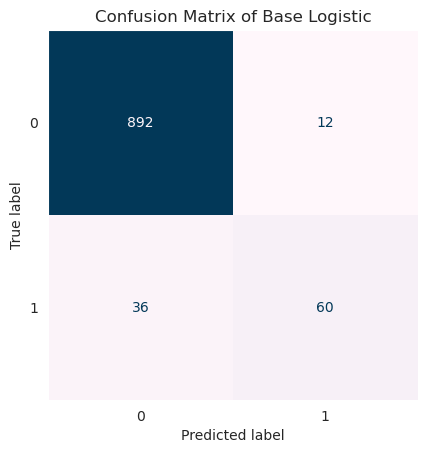

In [266]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test1, y_test1, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Base Logistic')
plt.grid(False)

In [267]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000



In [268]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [269]:
Baselog_result = metrics_calculator(y_test1, y_pred, 'Base Logistic')
Baselog_result

,Base Logistic
Accuracy,0.952000
Precision,0.897270
Recall,0.805863
F1-score,0.844042


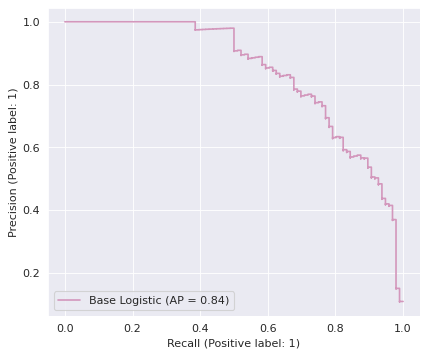

In [270]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(logistic_model, X_test1, y_test1, ax=ax, name='Base Logistic', color='#d397bc')
plt.show()

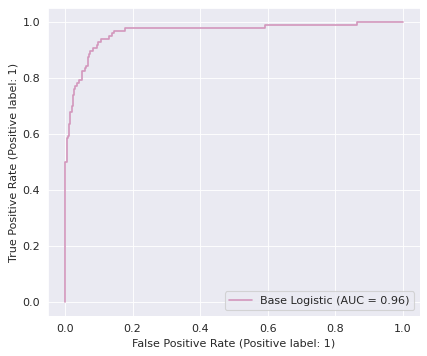

In [271]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(logistic_model, X_test1, y_test1, ax=ax, name='Base Logistic', color='#d397bc')
plt.show()

In [272]:
from sklearn.model_selection import GridSearchCV

# Finding optimal hyperparameters(GridSearchCV)

# Define model
model = LogisticRegression()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['max_iter'] = [100, 500, 1000]
space['multi_class'] = ['auto', 'ovr', 'multinomial']

# Define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV = search.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
logistic_modelcv = GridSearchCV.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

Best Score: 0.9517499999999998
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}


In [273]:
logistic_modelcv.fit(X_train1, y_train1)

LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')

In [274]:
y_pred = logistic_modelcv.predict(X_test1)

In [275]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

Model accuracy score: 0.9520


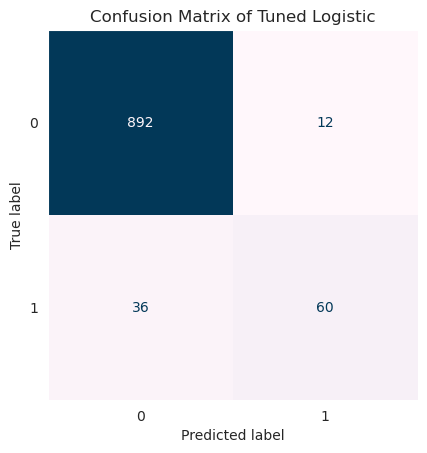

In [276]:
ConfusionMatrixDisplay.from_estimator(logistic_modelcv, X_test1, y_test1, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Tuned Logistic')
plt.grid(False)

In [277]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000



In [278]:
Finallog_result = metrics_calculator(y_test1, y_pred, 'Tuned Logistic')
Finallog_result

,Tuned Logistic
Accuracy,0.952000
Precision,0.897270
Recall,0.805863
F1-score,0.844042


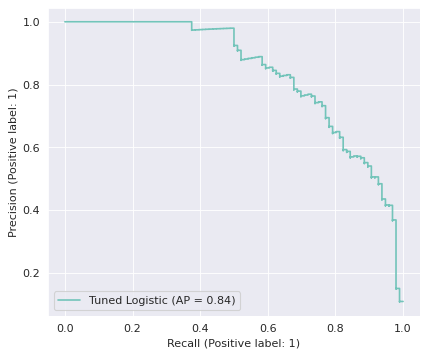

In [279]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(logistic_modelcv, X_test1, y_test1, ax=ax, name='Tuned Logistic', color='#73c4ba')
plt.show()

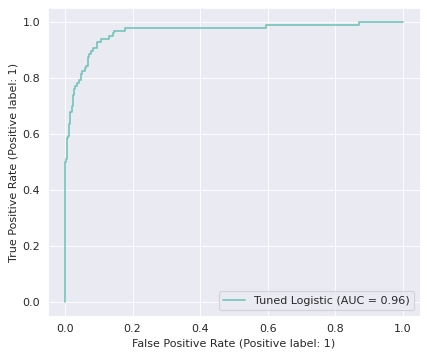

In [280]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(logistic_modelcv, X_test1, y_test1, ax=ax, name='Tuned Logistic', color='#73c4ba')
plt.show()

In [281]:
df1 = df.copy()

In [282]:
df2 = pd.DataFrame ({"Age" : [42], "Experience" : [16], "Income" : [2.5], "Family" : [3],
                    "CCAvg" : [1.2], "Education" : [3], "Mortgage" : [0],"Personal Loan" : [1],
                    "Securities Account" : [1], "CD Account" : [0], "Online" : [1], "CreditCard" : [1]})

In [283]:
Df = pd.concat([df1, df2])
Df.reset_index(drop=True, inplace=True) 
Df.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4996,30,4,1.25,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.00,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.08,3,0.5,2,0,0,0,0,1,0
4999,28,4,6.92,3,0.8,1,0,0,0,0,1,1
5000,42,16,2.50,3,1.2,3,0,1,1,0,1,1


In [284]:
X_train_sample1 = Df [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                      "Securities Account", "CD Account", "Online", "CreditCard"]][:5000]
y_train_sample1 = Df ["Personal Loan"][:5000].ravel()

In [285]:
X_test_sample1 = Df [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                     "Securities Account", "CD Account", "Online", "CreditCard"]][5000:]
X_test_sample1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
5000,42,16,2.5,3,1.2,3,0,1,0,1,1


In [286]:
logreg_sample = LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')  
logreg_sample.fit (X_train_sample1, y_train_sample1)

LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')

In [287]:
y_pred_sample1 = logreg_sample.predict (X_test_sample1)

In [288]:
print ("Personal Loan Result:", y_pred_sample1)

Personal Loan Result: [0]


In [289]:
df3 = df.copy()

In [290]:
# Age
bin_Age = [0, 29, 39, 49, 59, 70]
category_Age = ['<30s', '30s', '40s', '50s', '>50s']
df3['Age_cat'] = pd.cut(df3['Age'], bins=bin_Age, labels=category_Age)

In [291]:
# Experience
bin_Experience = [-1, 9, 19, 29, 39, 50]
category_Experience = ['<10s', '10s', '20s', '30s', '>30s']
df3['Experience_cat'] = pd.cut(df3['Experience'], bins=bin_Experience, labels=category_Experience)

In [292]:
# Income
bin_Income = [0, 4, 9, 14, 20]
category_Income = ['<5s', '5s', '10s', '10>s']
df3['Income_cat'] = pd.cut(df3['Income'], bins=bin_Income, labels=category_Income)

In [293]:
# CCAvg
bin_CCAvg = [-1, 1, 3, 5, 7, 10]
category_CCAvg = ['<2s', '2s', '4s', '6s', '>6s']
df3['CCAvg_cat'] = pd.cut(df3['CCAvg'], bins=bin_CCAvg, labels=category_CCAvg)

In [294]:
# Mortgage
bin_Mortgage = [-1, 49, 99, 149, 199, 249, 299, 349, 399, 700]
category_Mortgage = ['<50s', '50s', '100s', '150s', '200s', '250s', '300s', '350s', '>350']
df3['Mortgage_cat'] = pd.cut(df3['Mortgage'], bins=bin_Mortgage, labels=category_Mortgage)

In [295]:
df3.shape

(5000, 17)

In [296]:
# Dropping extra features 
df3 = df3.drop(['Age'], axis = 1)
df3 = df3.drop(['Experience'], axis = 1)
df3 = df3.drop(['Income'], axis = 1)
df3 = df3.drop(['CCAvg'], axis = 1)
df3 = df3.drop(['Mortgage'], axis = 1)
df3.shape

(5000, 12)

In [297]:
df3[df3.select_dtypes('int64').columns] = df3.select_dtypes('int64').astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Family              5000 non-null   category
 1   Education           5000 non-null   category
 2   Personal Loan       5000 non-null   category
 3   Securities Account  5000 non-null   category
 4   CD Account          5000 non-null   category
 5   Online              5000 non-null   category
 6   CreditCard          5000 non-null   category
 7   Age_cat             5000 non-null   category
 8   Experience_cat      5000 non-null   category
 9   Income_cat          5000 non-null   category
 10  CCAvg_cat           5000 non-null   category
 11  Mortgage_cat        5000 non-null   category
dtypes: category(12)
memory usage: 60.8 KB


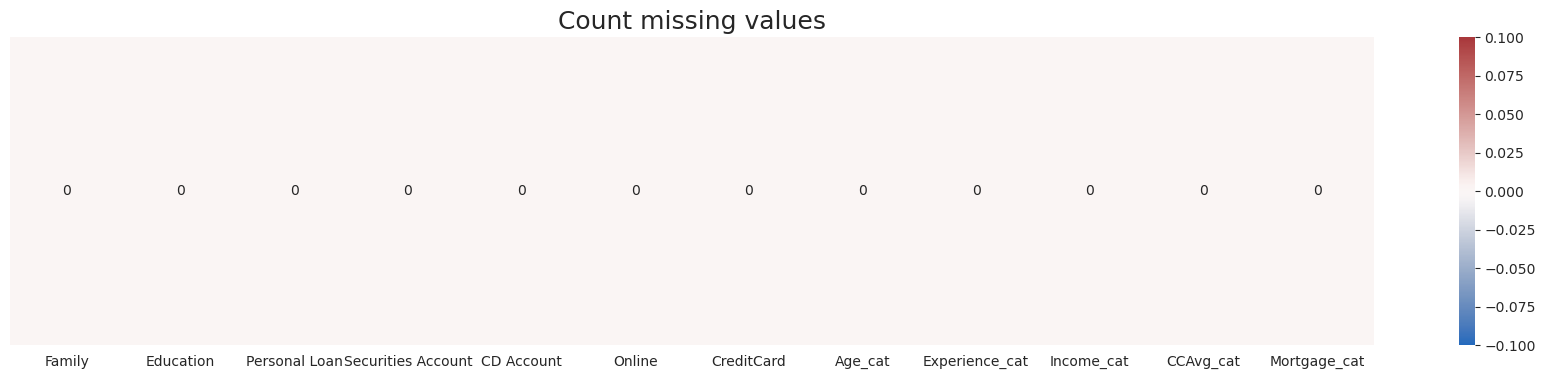

In [298]:
df3.info()
plt.figure(figsize=(22,4))
sns.heatmap((df3.isna().sum()).to_frame(name='').T,cmap='vlag', 
            annot=True, fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

In [299]:
df4 = pd.get_dummies(df3.drop('Personal Loan', axis=1))
df4.insert(0, 'Personal Loan', df3['Personal Loan'])
df4 = df4.astype('int64')
df4

,Personal Loan,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,...,CCAvg_cat_>6s,Mortgage_cat_<50s,Mortgage_cat_50s,Mortgage_cat_100s,Mortgage_cat_150s,Mortgage_cat_200s,Mortgage_cat_250s,Mortgage_cat_300s,Mortgage_cat_350s,Mortgage_cat_>350
0,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4996,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4997,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4998,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [300]:
X = df4.drop('Personal Loan', axis=1)
y = df4['Personal Loan'].ravel()

In [301]:
print ('X:', X.shape, '\ny:', y.shape)

X: (5000, 43) 
y: (5000,)


In [302]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train2, X_test2, y_train2, y_test2 = train_test_split (X, y, test_size=size, random_state=0)
    clf = ComplementNB ()
    clf.fit (X_train2, y_train2)
    score.append (clf.score (X_test2, y_test2))
    
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')

,Test size,Score
0,0.200000,0.882000
1,0.250000,0.881600
2,0.300000,0.876000


In [303]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)

In [304]:
print('X_train shape: ', X_train2.shape)
print('X_test shape: ', X_test2.shape)
print('y_train shape: ', y_train2.shape)
print('y_test shape: ',y_test2.shape)

X_train shape:  (4000, 43)
X_test shape:  (1000, 43)
y_train shape:  (4000,)
y_test shape:  (1000,)


In [305]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train2 = scaler.fit_transform(X_train2)

# Transform the test data using the same scaler
X_test2 = scaler.transform(X_test2)

In [306]:
CNBmodel = ComplementNB()
CNBmodel.fit(X_train2, y_train2)

ComplementNB()

In [307]:
y_pred = CNBmodel.predict(X_test2)

In [308]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred)))

Model Accuracy Score: 0.8710


In [309]:
print('Training set score: {:.4f}'.format(CNBmodel.score(X_train2, y_train2)))
print('Test set score: {:.4f}'.format(CNBmodel.score(X_test2, y_test2)))

Training set score: 0.8722
Test set score: 0.8710


In [310]:
kf = KFold(n_splits=10, shuffle=False)

In [311]:
score = cross_val_score(CNBmodel, X_train2, y_train2, cv=kf, scoring='recall')
CNBmodel_cv_score = score.mean()
CNBmodel_cv_stdev = stdev(score)
print('Cross Validation Recall scores are:\n {}'.format(score))

Cross Validation Recall scores are:
 [0.94871795 0.94285714 0.97368421 0.88571429 0.82608696 0.86666667
 0.93939394 0.86842105 0.9047619  0.93939394]


In [312]:
Recall = ['Cross Validation Recall']
CNB_R = pd.DataFrame({'CV Mean':CNBmodel_cv_score,'Std':CNBmodel_cv_stdev},index=Recall)
CNB_R

,CV Mean,Std
Cross Validation Recall,0.90957,0.046697


In [313]:
score = cross_val_score(CNBmodel, X_train2, y_train2, cv=kf, scoring='accuracy')
CNBmodel_cv_score1 = score.mean()
CNBmodel_cv_stdev1 = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.885  0.855  0.91   0.8625 0.855  0.8575 0.8825 0.88   0.87   0.855 ]


In [314]:
Accuracy = ['Cross Validation Accuracy']
CNB_A = pd.DataFrame({'CV Mean':CNBmodel_cv_score1,'Std':CNBmodel_cv_stdev1},index=Accuracy)
CNB_A

,CV Mean,Std
Cross Validation Accuracy,0.87125,0.018114


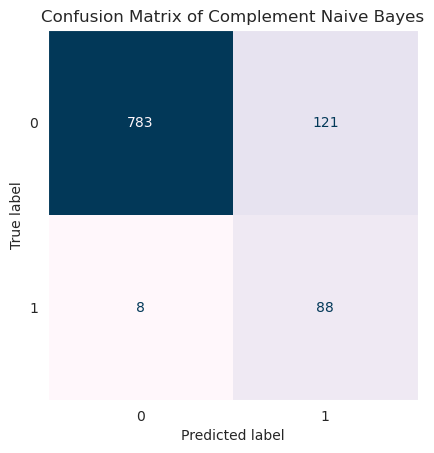

In [315]:
ConfusionMatrixDisplay.from_estimator(CNBmodel, X_test2, y_test2, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Complement Naive Bayes')
plt.grid(False)

In [316]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       904
           1       0.42      0.92      0.58        96

    accuracy                           0.87      1000
   macro avg       0.71      0.89      0.75      1000
weighted avg       0.94      0.87      0.89      1000



In [317]:
CNB_result = metrics_calculator(y_test2, y_pred, 'Complement Naive Bayes')
CNB_result

,Complement Naive Bayes
Accuracy,0.871000
Precision,0.705469
Recall,0.891409
F1-score,0.750471


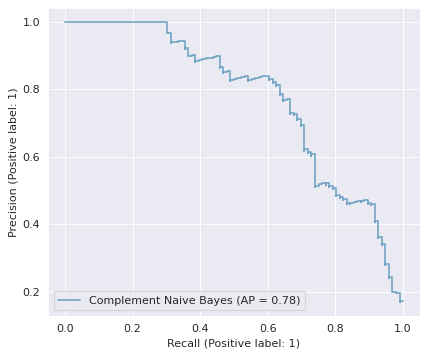

In [318]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(CNBmodel, X_test2, y_test2, ax=ax, name='Complement Naive Bayes', color='#73a5c4')
plt.show()

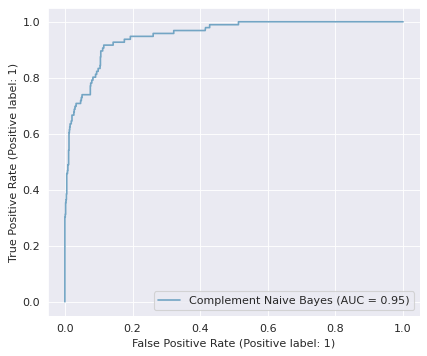

In [319]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(CNBmodel, X_test2, y_test2, ax=ax, name='Complement Naive Bayes', color='#73a5c4')
plt.show()

In [320]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [321]:
print ('X:', X.shape, '\ny:', y.shape)

X: (5000, 11) 
y: (5000,)


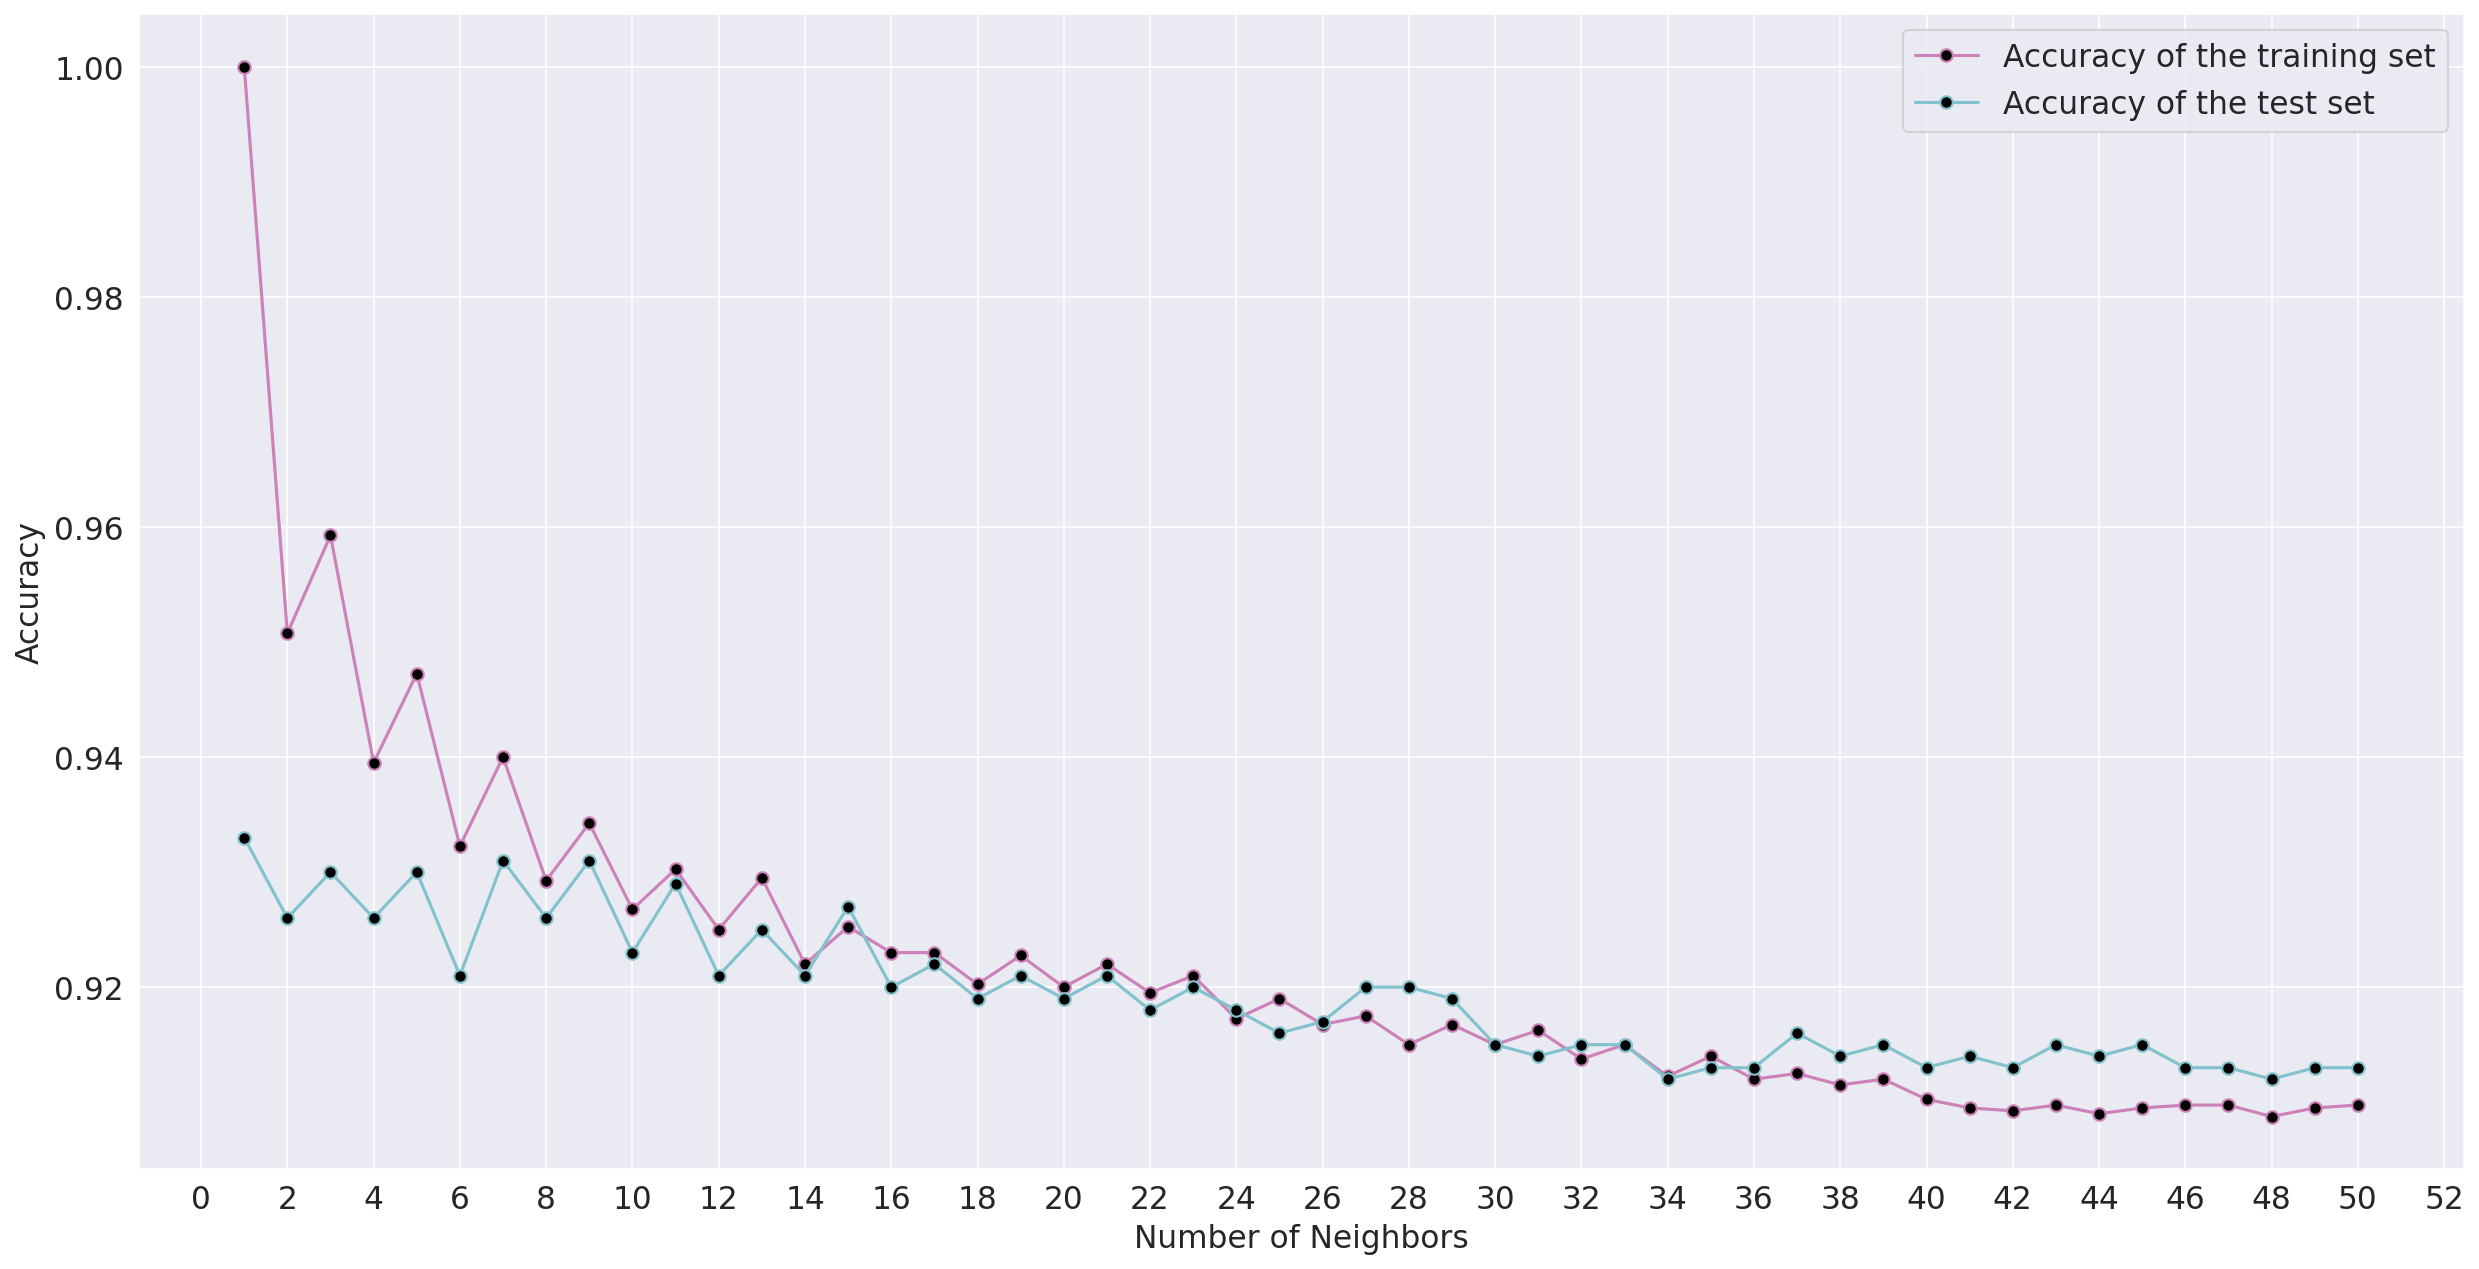

In [322]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=0)

training_accuracy = [KNeighborsClassifier(n_neighbors=i).fit(X_train3, y_train3).score(X_train3, y_train3) for i in range(1, 51)]
test_accuracy = [KNeighborsClassifier(n_neighbors=i).fit(X_train3, y_train3).score(X_test3, y_test3) for i in range(1, 51)]

plt.figure(figsize=(20, 10), dpi=150)
plt.xticks(range(0, 55, 2), fontsize=15)
plt.yticks(fontsize=15)

plt.plot(range(1, 51), training_accuracy, label="Accuracy of the training set", color='#cc81b9', 
                       marker='o', markerfacecolor='black', markersize=6)
plt.plot(range(1, 51), test_accuracy, label="Accuracy of the test set", color='#81c2cc', 
                       marker='o', markerfacecolor='black', markersize=6)

plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("Number of Neighbors", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [323]:
max_neighbors = 50
accuracy = np.zeros(max_neighbors)

for i in range(2, max_neighbors+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train3, y_train3)
    y_pred = knn.predict(X_test3)
    accuracy[i-1] = metrics.accuracy_score(y_test3, y_pred)

best_accuracy = np.max(accuracy)
best_k = np.argmax(accuracy) + 1

print(f"Accuracy scores:\n{accuracy}")
print(f"\nBest accuracy: {best_accuracy:.3f} for k = {best_k}")

Accuracy scores:
[0.    0.926 0.93  0.926 0.93  0.921 0.931 0.926 0.931 0.923 0.929 0.921
 0.925 0.921 0.927 0.92  0.922 0.919 0.921 0.919 0.921 0.918 0.92  0.918
 0.916 0.917 0.92  0.92  0.919 0.915 0.914 0.915 0.915 0.912 0.913 0.913
 0.916 0.914 0.915 0.913 0.914 0.913 0.915 0.914 0.915 0.913 0.913 0.912
 0.913 0.913]

Best accuracy: 0.931 for k = 7


In [324]:
K = best_k

# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

#Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, test_size=size, random_state=0)
    Knn = KNeighborsClassifier (n_neighbors = K)
    Knn.fit (X_train3, y_train3)
    score.append (Knn.score (X_test3, y_test3))
    
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')

,Test size,Score
1,0.250000,0.932800
2,0.300000,0.932667
0,0.200000,0.931000


In [325]:
X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, stratify=y, test_size = 0.25 , random_state = 0)

In [326]:
print('X_train shape: ', X_train3.shape)
print('X_test shape: ', X_test3.shape)
print('y_train shape: ', y_train3.shape)
print('y_test shape: ',y_test3.shape)

X_train shape:  (3750, 11)
X_test shape:  (1250, 11)
y_train shape:  (3750,)
y_test shape:  (1250,)


In [327]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train3 = scaler.fit_transform(X_train3)

# Transform the test data using the same scaler
X_test3 = scaler.transform(X_test3)

In [328]:
knn_model = KNeighborsClassifier(n_neighbors = best_k)
knn_model.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=7)

In [329]:
y_pred = knn_model.predict(X_test3)

In [330]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

Model accuracy score: 0.9512


In [331]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn_model.score(X_train3, y_train3)))
print('Test set score: {:.4f}'.format(knn_model.score(X_test3, y_test3)))

Training set score: 0.9645
Test set score: 0.9512


In [332]:
y_test3.shape

(1250,)

In [333]:
# Check Personal Loan distribution in test set
s = pd.Series(y_test3)
s.value_counts()

0    1130
1     120
dtype: int64

In [334]:
# Check null accuracy score
null_accuracy = (1130/(1130+120))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9040


In [335]:
kf = KFold(n_splits=10, shuffle=False)

In [336]:
score = cross_val_score(knn_model, X_train3, y_train3, cv=kf, scoring='recall')
knn_model_cv_score = score.mean()
knn_model_cv_stdev = stdev(score)
print('Cross Validation Recall scores are:\n {}'.format(score))

Cross Validation Recall scores are:
 [0.42105263 0.75       0.56       0.60869565 0.66666667 0.5
 0.47058824 0.37142857 0.64705882 0.77777778]


In [337]:
Recall = ['Cross Validation Recall']
knn_R = pd.DataFrame({'CV Mean':knn_model_cv_score,'Std':knn_model_cv_stdev},index=Recall)
knn_R

,CV Mean,Std
Cross Validation Recall,0.577327,0.136753


In [338]:
score = cross_val_score(knn_model, X_train3, y_train3, cv=kf, scoring='accuracy')
knn_model_cv_score1 = score.mean()
knn_model_cv_stdev1 = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.94133333 0.97066667 0.96266667 0.94933333 0.95733333 0.95466667
 0.94666667 0.93866667 0.96266667 0.97066667]


In [339]:
Accuracy  = ['Cross Validation Accuracy ']
knn_A = pd.DataFrame({'CV Mean':knn_model_cv_score1,'Std':knn_model_cv_stdev1},index=Accuracy )
knn_A

,CV Mean,Std
Cross Validation Accuracy,0.955467,0.011387


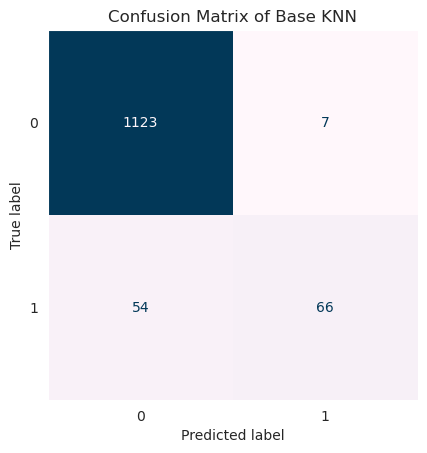

In [340]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test3, y_test3, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Base KNN')
plt.grid(False)

In [341]:
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1130
           1       0.90      0.55      0.68       120

    accuracy                           0.95      1250
   macro avg       0.93      0.77      0.83      1250
weighted avg       0.95      0.95      0.95      1250



In [342]:
Baseknn_result = metrics_calculator(y_test3, y_pred, 'Base KNN')
Baseknn_result

,Base KNN
Accuracy,0.951200
Precision,0.929115
Recall,0.771903
F1-score,0.828748


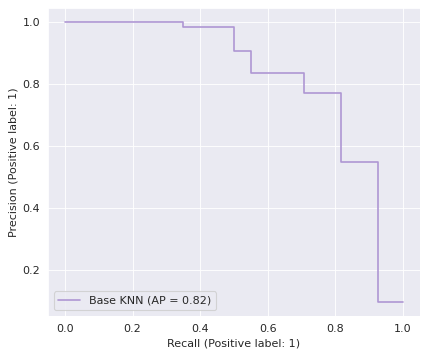

In [343]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(knn_model, X_test3, y_test3, ax=ax, name='Base KNN', color='#ae97d3')
plt.show()

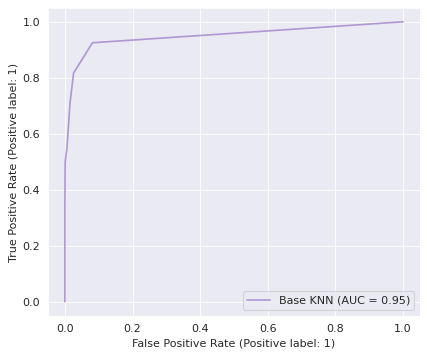

In [344]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(knn_model, X_test3, y_test3, ax=ax, name='Base KNN', color='#ae97d3')
plt.show()

In [345]:
from sklearn.model_selection import GridSearchCV

# Finding optimal hyperparameters(GridSearchCV)

# Define model
model = KNeighborsClassifier()

# Define search parameters
k_range = range(2, 51)
weight_options = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
leaf_size = range(10, 51, 10)

param_grid = {"n_neighbors": k_range, "weights": weight_options, "metric": metric, "leaf_size": leaf_size}

# Define search
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1, n_jobs=-1)
  
# Execute search
grid_search=grid.fit(X_train3, y_train3.ravel())

# Summarize result
print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Fitting 10 folds for each of 1960 candidates, totalling 19600 fits
Best Score: 0.9608000000000001
Best Hyperparameters: {'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


In [346]:
knn_modelcv = KNeighborsClassifier(leaf_size= 10, metric= 'euclidean', n_neighbors= 4, weights= 'distance')
knn_modelcv.fit(X_train3, y_train3)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=4,
                     weights='distance')

In [347]:
y_pred = knn_modelcv.predict(X_test3)

In [348]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

Model accuracy score: 0.9672


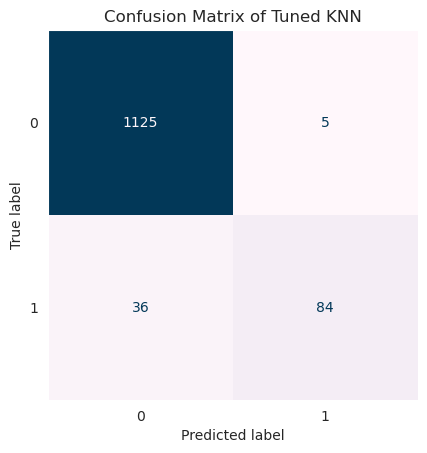

In [349]:
ConfusionMatrixDisplay.from_estimator(knn_modelcv, X_test3, y_test3, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Tuned KNN')
plt.grid(False)

In [350]:
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1130
           1       0.94      0.70      0.80       120

    accuracy                           0.97      1250
   macro avg       0.96      0.85      0.89      1250
weighted avg       0.97      0.97      0.96      1250



In [351]:
Finalknn_result = metrics_calculator(y_test3, y_pred, 'Tuned KNN')
Finalknn_result

,Tuned KNN
Accuracy,0.967200
Precision,0.956406
Recall,0.847788
F1-score,0.892966


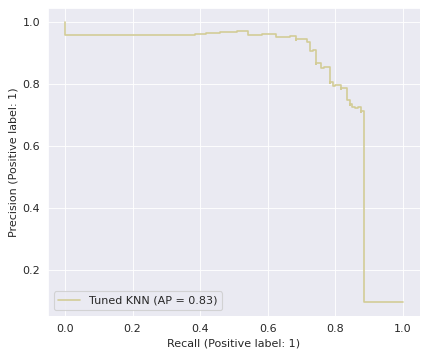

In [352]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(knn_modelcv, X_test3, y_test3, ax=ax, name='Tuned KNN', color='#d3cc97')
plt.show()

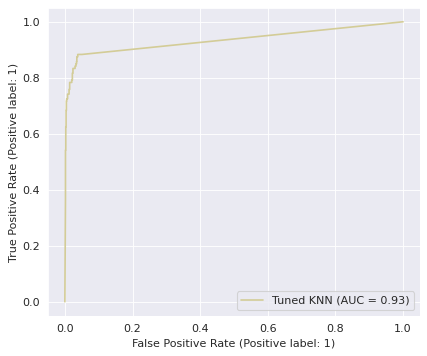

In [353]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(knn_modelcv, X_test3, y_test3, ax=ax, name='Tuned KNN', color='#d3cc97')
plt.show()

In [354]:
df1 = df.copy()

In [355]:
Df = pd.concat([df1, df2])
Df.reset_index(drop=True, inplace=True) 
Df.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4996,30,4,1.25,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.00,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.08,3,0.5,2,0,0,0,0,1,0
4999,28,4,6.92,3,0.8,1,0,0,0,0,1,1
5000,42,16,2.50,3,1.2,3,0,1,1,0,1,1


In [356]:
X_train_sample = Df [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                      "Securities Account", "CD Account", "Online", "CreditCard"]][:5000]
y_train_sample = Df ["Personal Loan"][:5000].ravel()

In [357]:
X_test_sample = Df [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                     "Securities Account", "CD Account", "Online", "CreditCard"]][5000:]
X_test_sample

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
5000,42,16,2.5,3,1.2,3,0,1,0,1,1


In [358]:
knn_sample = KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=4, weights='distance') 
knn_sample.fit(X_train_sample, y_train_sample)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=4,
                     weights='distance')

In [359]:
y_pred_sample = knn_sample.predict(X_test_sample)

In [360]:
print ("Personal Loan Result:", y_pred_sample)

Personal Loan Result: [0]


In [361]:
Conclusion = pd.concat([Baselog_result, Finallog_result, CNB_result, Baseknn_result, Finalknn_result], axis=1)
Conclusion

,Base Logistic,Tuned Logistic,Complement Naive Bayes,Base KNN,Tuned KNN
Accuracy,0.952000,0.952000,0.871000,0.951200,0.967200
Precision,0.897270,0.897270,0.705469,0.929115,0.956406
Recall,0.805863,0.805863,0.891409,0.771903,0.847788
F1-score,0.844042,0.844042,0.750471,0.828748,0.892966


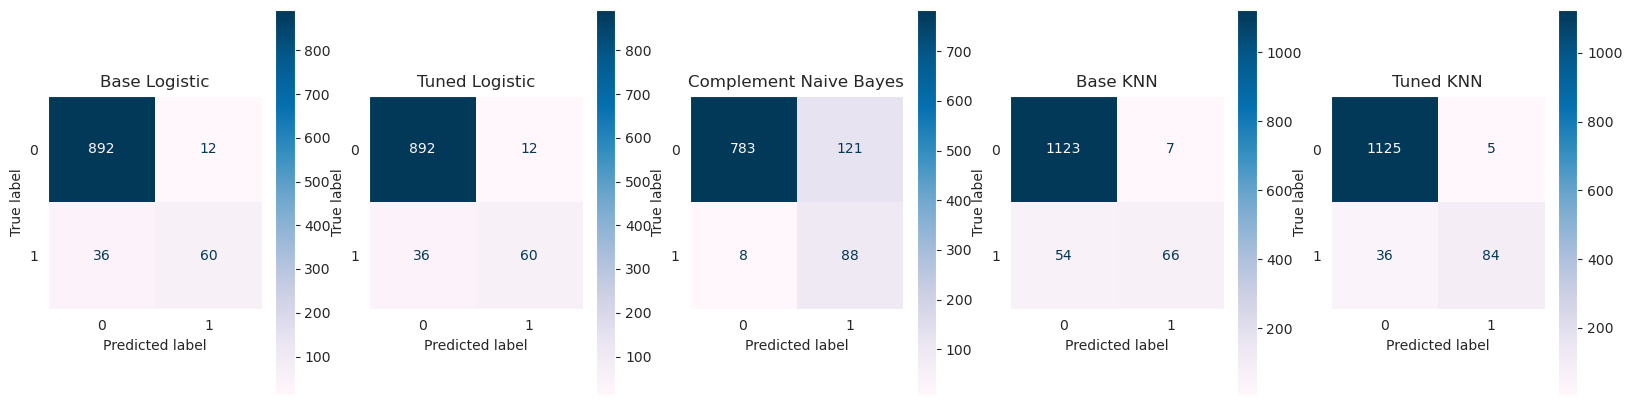

In [362]:
# Confusion Matrix of Base Logistic
cm1 = confusion_matrix(y_test1, logistic_model.predict(X_test1))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=logistic_model.classes_)

# Confusion Matrix of Tuned Logistic
cm2 = confusion_matrix(y_test1, logistic_modelcv.predict(X_test1))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=logistic_modelcv.classes_)

# Confusion Matrix of Complement Naive Bayes
cm3 = confusion_matrix(y_test2, CNBmodel.predict(X_test2))
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=CNBmodel.classes_)

# Confusion Matrix of Base KNN
cm4 = confusion_matrix(y_test3, knn_model.predict(X_test3))
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=knn_model.classes_)

# Confusion Matrix of Tuned KNN
cm5 = confusion_matrix(y_test3, knn_modelcv.predict(X_test3))
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=knn_modelcv.classes_)

# Plot all confusion matrices using subplot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

disp1.plot(cmap='PuBu', ax=axs[0])
axs[0].set_title('Base Logistic')
axs[0].grid(False)

disp2.plot(cmap='PuBu', ax=axs[1])
axs[1].set_title('Tuned Logistic')
axs[1].grid(False)

disp3.plot(cmap='PuBu', ax=axs[2])
axs[2].set_title('Complement Naive Bayes')
axs[2].grid(False)

disp4.plot(cmap='PuBu', ax=axs[3])
axs[3].set_title('Base KNN')
axs[3].grid(False)

disp5.plot(cmap='PuBu', ax=axs[4])
axs[4].set_title('Tuned KNN')
axs[4].grid(False)

plt.show()

In [363]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [364]:
print ('X:', X.shape, '\ny:', y.shape)

X: (5000, 11) 
y: (5000,)


In [365]:
X_train, X_test, y_train, y_test = train_test_split (X, y, stratify=y, test_size = 0.25 , random_state = 0)

In [366]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (3750, 11)
X_test shape:  (1250, 11)
y_train shape:  (3750,)
y_test shape:  (1250,)


In [367]:
cols = X_train.columns

In [368]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

In [369]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [370]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [371]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.659091,0.651163,0.217222,0.000000,0.16,0.5,0.357480,0.0,0.0,0.0,0.0
1,0.340909,0.325581,0.212778,0.333333,0.06,1.0,0.343307,0.0,0.0,0.0,0.0
2,0.272727,0.232558,0.060000,0.666667,0.13,0.0,0.181102,0.0,0.0,0.0,0.0
3,0.863636,0.813953,0.240556,0.000000,0.28,0.5,0.000000,0.0,0.0,1.0,1.0
4,0.818182,0.767442,0.008889,1.000000,0.07,1.0,0.000000,0.0,0.0,1.0,0.0


In [372]:
# Define the models
knn = KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=4, weights='distance')
lr = LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')
nb = ComplementNB()

# Create the ensemble
ensemble = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('NB', nb)], voting='soft')

# Train the ensemble on the training set
ensemble.fit(X_train, y_train)

# Evaluate the accuracy of the ensemble on the test set
y_pred_voting = ensemble.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_voting)
print(f'The accuracy for the ensembled model is:', accuracy)

# Evaluate the cross-validated accuracy of the ensemble
cross_val_accuracy = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='accuracy')
print(f'The cross-validated accuracy is:', cross_val_accuracy.mean())

The accuracy for the ensembled model is: 0.9608
The cross-validated accuracy is: 0.9597333333333331


In [373]:
Tuned_voting_classifier_result = metrics_calculator(y_test, y_pred_voting, 'Tuned Voting Classifier')
Tuned_voting_classifier_result

,Tuned Voting Classifier
Accuracy,0.960800
Precision,0.945432
Recall,0.818178
F1-score,0.868644


In [374]:
# Define the base model
#knn = KNeighborsClassifier()

# Define the bagging model
#bagging = BaggingClassifier(base_estimator=knn)

# Define the hyperparameters to tune
#param_grid = {'n_estimators': [10, 20, 30],
              #'max_samples': [0.5, 0.7, 0.9],
              #'max_features': [0.5, 0.7, 0.9],
              #'base_estimator__n_neighbors': [3, 5, 7],
              #'base_estimator__weights': ['uniform', 'distance']}

# Tune hyperparameters using GridSearchCV
#grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# fit the grid search on the data
#grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
#Bagging = grid_search.best_estimator_

# Print the best hyperparameters and the corresponding score
#print("Best hyperparameters: ", grid_search.best_params_)

In [375]:
Bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3, weights='distance'),
                                           max_features=0.9, max_samples=0.9, n_estimators=30)

In [376]:
# fit the bagging model on the training set
Bagging.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
y_pred_bagging = Bagging.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_bagging)
print('Accuracy of the Bagged KNN Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the bagging model
cross_val_scores = cross_val_score(Bagging, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Bagged KNN Model:', cross_val_scores.mean())

Accuracy of the Bagged KNN Model on the test set: 0.964
Cross-validated Score of the Bagged KNN Model: 0.9581333333333332


In [377]:
Tuned_bagged_KNN_result = metrics_calculator(y_test, y_pred_bagging, 'Tuned Bagged KNN')
Tuned_bagged_KNN_result

,Tuned Bagged KNN
Accuracy,0.964000
Precision,0.974751
Recall,0.816224
F1-score,0.876017


In [378]:
# define the AdaBoost model with default hyperparameters
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

# define the hyperparameters to tune
params = {'n_estimators': [200, 500, 900], 'learning_rate': [0.1, 0.01, 1]}

# base_estimator__max_depth = [1, 2, 3, 4, 5]

# define the grid search using cross validation
grid_search = GridSearchCV(estimator=ada, param_grid=params, cv=10, scoring='accuracy')

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
AdaBoost = grid_search.best_estimator_

# print the best hyperparameters and their corresponding score
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 200}


In [379]:
# fit the AdaBoost model on the training set
AdaBoost.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
y_pred_ada = AdaBoost.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_ada)
print('Accuracy of the AdaBoost on the test set:', accuracy)

# calculate and print the mean cross-validated score of the AdaBoost model
cross_val_scores = cross_val_score(AdaBoost, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for AdaBoost is:', cross_val_scores.mean())

Accuracy of the AdaBoost on the test set: 0.9896
The Cross-validated Score for AdaBoost is: 0.9821333333333333


In [380]:
Tuned_ada_result = metrics_calculator(y_test, y_pred_ada, 'Tuned AdaBoost')
Tuned_ada_result

,Tuned AdaBoost
Accuracy,0.989600
Precision,0.975102
Recall,0.964454
F1-score,0.969702


In [381]:
# Define the GradientBoosting model with default hyperparameters
grad = GradientBoostingClassifier(learning_rate=0.1, random_state=0)

# Define the hyperparameters to tune
parameters = {'n_estimators': [500, 900], 'max_depth': [5, 7]}

#learning_rate = [0.01, 0.1]
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]

# Create the grid search object
grid_search = GridSearchCV(grad, parameters, cv=10, scoring='accuracy')

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Gradient_Boosting = grid_search.best_estimator_

# Print the results
print('Best parameters:', grid_search.best_params_)

Best parameters: {'max_depth': 7, 'n_estimators': 500}


In [382]:
# fit the GradientBoosting model on the training set
Gradient_Boosting.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
y_pred_gradient = Gradient_Boosting.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_gradient)
print('Accuracy of the GradientBoosting on the test set:', accuracy)

# calculate and print the mean cross-validated score of the GradientBoosting model
cross_val_scores = cross_val_score(Gradient_Boosting, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for GradientBoosting is:', cross_val_scores.mean())

Accuracy of the GradientBoosting on the test set: 0.9848
The Cross-validated Score for GradientBoosting is: 0.9895999999999999


In [383]:
Tuned_gradient_boosting_result = metrics_calculator(y_test, y_pred_gradient, 'Tuned Gradient Boosting')
Tuned_gradient_boosting_result

,Tuned Gradient Boosting
Accuracy,0.984800
Precision,0.960958
Recall,0.950627
F1-score,0.955718


In [384]:
# Create XGBoost classifier
xgboost = xg.XGBClassifier(objective='binary:logistic', learning_rate=0.1)

# Set hyperparameters to tune
param_grid = {'n_estimators': [500, 900], 'max_depth': [5, 7]}

#learning_rate = [0.01, 0.1]
#subsample = [0.6, 0.8, 1.0]
#colsample_bytree = [0.6, 0.8, 1.0]
#gamma = [0, 1, 5]

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='accuracy', cv=10)

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Xgboost = grid_search.best_estimator_

# Print results
print('The best hyperparameters are:', grid_search.best_params_)

The best hyperparameters are: {'max_depth': 5, 'n_estimators': 500}


In [385]:
# fit the XGBoost model on the training set
Xgboost.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
y_pred_Xgboost = Xgboost.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_Xgboost)
print('Accuracy of the GradientBoosting on the test set:', accuracy)

# calculate and print the mean cross-validated score of the XGBoost model
cross_val_scores = cross_val_score(Xgboost, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for GradientBoosting is:', cross_val_scores.mean())

Accuracy of the GradientBoosting on the test set: 0.9832
The Cross-validated Score for GradientBoosting is: 0.9880000000000001


In [386]:
Tuned_XGBoost_result = metrics_calculator(y_test, y_pred_Xgboost, 'Tuned XGBoost')
Tuned_XGBoost_result

,Tuned XGBoost
Accuracy,0.983200
Precision,0.959491
Recall,0.942294
F1-score,0.950683


In [387]:
Ensemble_Conclusion = pd.concat([Tuned_voting_classifier_result, Tuned_bagged_KNN_result, Tuned_ada_result, Tuned_gradient_boosting_result, Tuned_XGBoost_result], axis=1)
Ensemble_Conclusion

,Tuned Voting Classifier,Tuned Bagged KNN,Tuned AdaBoost,Tuned Gradient Boosting,Tuned XGBoost
Accuracy,0.960800,0.964000,0.989600,0.984800,0.983200
Precision,0.945432,0.974751,0.975102,0.960958,0.959491
Recall,0.818178,0.816224,0.964454,0.950627,0.942294
F1-score,0.868644,0.876017,0.969702,0.955718,0.950683


In [388]:
# Tuned AdaBoost
y_pred_tuned_ada = AdaBoost.predict(X_test)

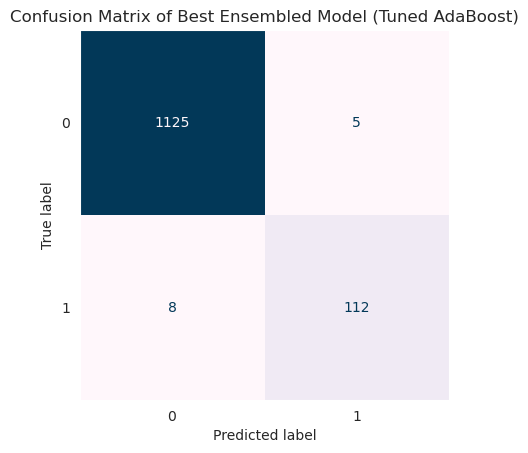

In [389]:
# Tuned AdaBoost
ConfusionMatrixDisplay.from_estimator(AdaBoost, X_test, y_test, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Best Ensembled Model (Tuned AdaBoost)')
plt.grid(False)

In [390]:
# Tuned AdaBoost
print(classification_report(y_test, y_pred_tuned_ada))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1130
           1       0.96      0.93      0.95       120

    accuracy                           0.99      1250
   macro avg       0.98      0.96      0.97      1250
weighted avg       0.99      0.99      0.99      1250



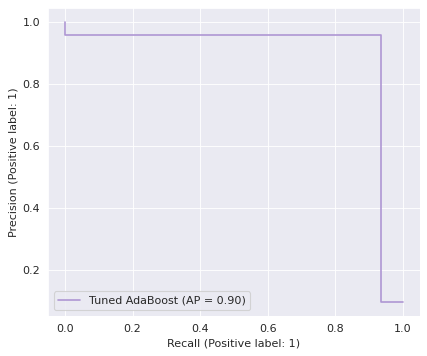

In [391]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(AdaBoost, X_test, y_test, ax=ax, name='Tuned AdaBoost', color='#ae97d3')
plt.show()

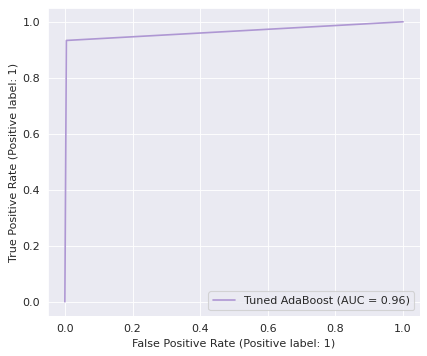

In [392]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(AdaBoost, X_test, y_test, ax=ax, name='Tuned AdaBoost', color='#ae97d3')
plt.show()

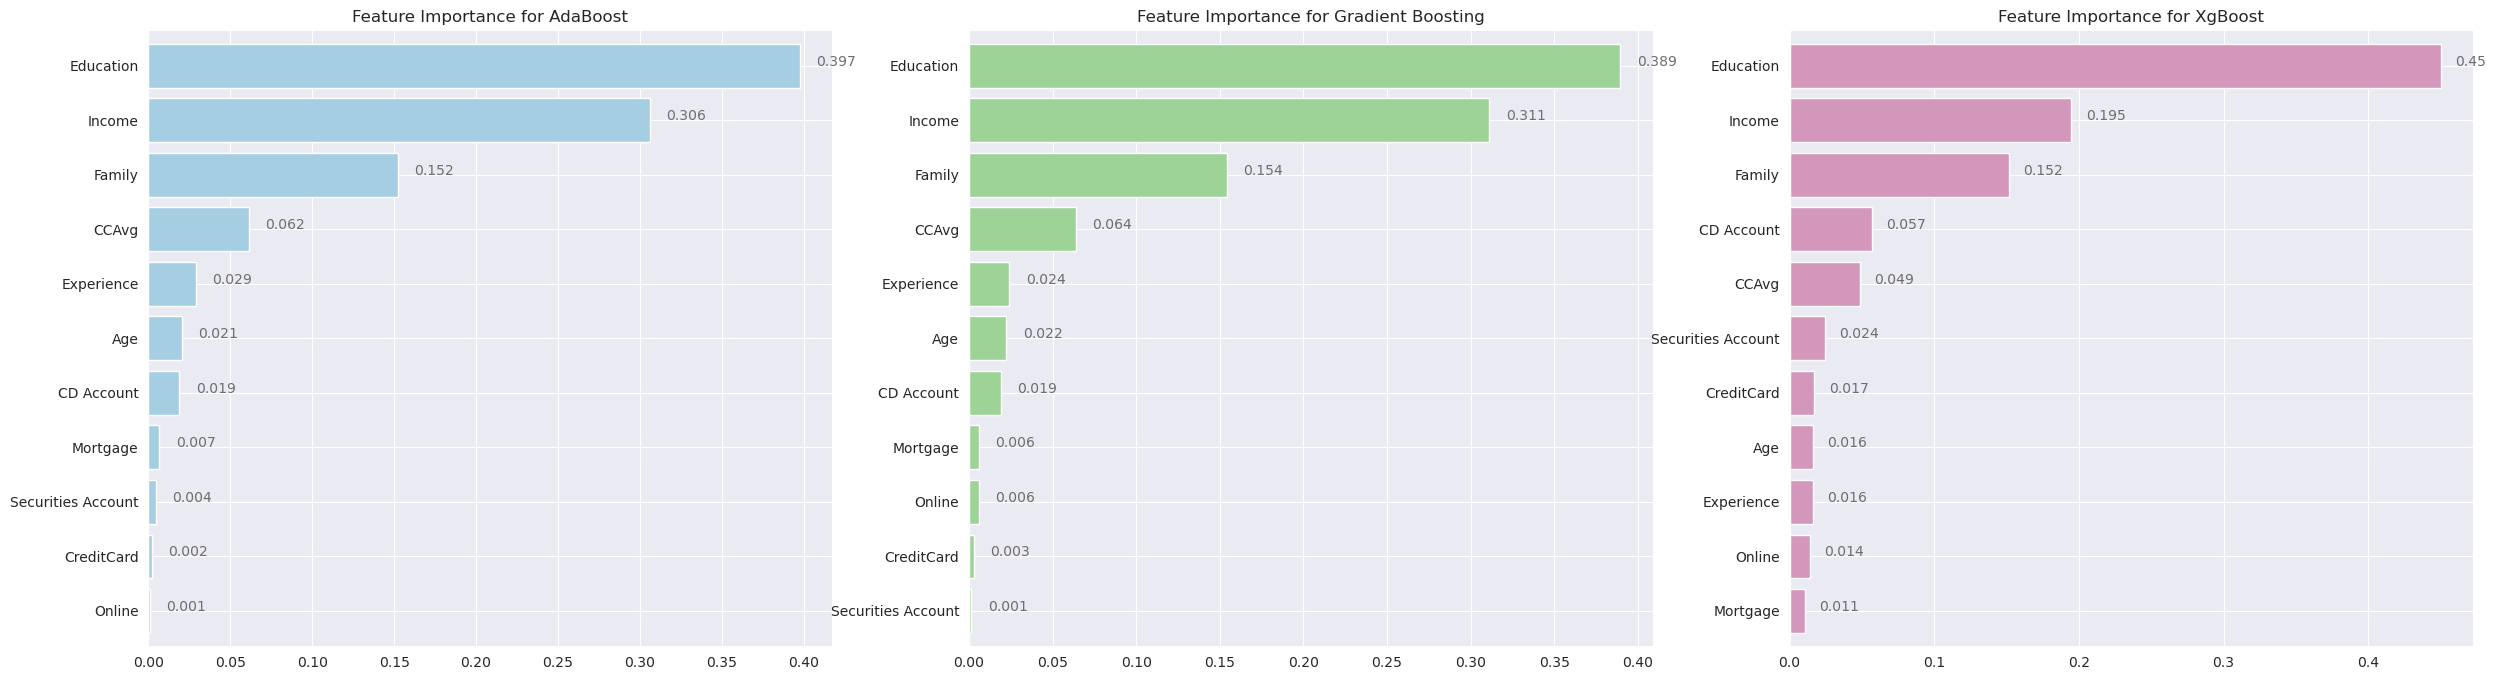

In [393]:
# create a figure with 3 subplots, each for a different model's feature importance
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

# plot AdaBoost's feature importance
feat_imp = pd.Series(AdaBoost.feature_importances_, X.columns).sort_values(ascending=True)
feat_imp.plot.barh(width=0.8, ax=ax[0])
ax[0].set_title('Feature Importance for AdaBoost')

# add text labels for the values of each bar
for i, v in enumerate(feat_imp):
    ax[0].text(v + 0.01, i, str(round(v, 3)), color='#6d6d6d', fontsize=10)

# plot Gradient Boosting's feature importance
feat_imp = pd.Series(Gradient_Boosting.feature_importances_, X.columns).sort_values(ascending=True)
feat_imp.plot.barh(width=0.8, ax=ax[1], color='#9ed397')
ax[1].set_title('Feature Importance for Gradient Boosting')

# add text labels for the values of each bar
for i, v in enumerate(feat_imp):
    ax[1].text(v + 0.01, i, str(round(v, 3)), color='#6d6d6d', fontsize=10)

# plot XgBoost's feature importance
feat_imp = pd.Series(Xgboost.feature_importances_, X.columns).sort_values(ascending=True)
feat_imp.plot.barh(width=0.8, ax=ax[2], color='#d397bc')
ax[2].set_title('Feature Importance for XgBoost')

# add text labels for the values of each bar
for i, v in enumerate(feat_imp):
    ax[2].text(v + 0.01, i, str(round(v, 3)), color='#6d6d6d', fontsize=10)

# display the plot
plt.show()